In [1]:
"""
- correct participant grouping
- no DWT utilization for artifact removal
- no rolling window
- (band power of participants x channels)
- five participants per group
-   The jupyter script is used to carry out the analysis of group runs
-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
-   The average of all scans in music therapy group and control group was used to develop the spectograms
-   Statistical analysis:   no rolling wondow applied as only participant scans were used
                            therefore, we have 6 music therapy scans and 5 control scans
"""

'\n- correct participant grouping\n- no DWT utilization for artifact removal\n- no rolling window\n- (band power of participants x channels)\n- five participants per group\n-   The jupyter script is used to carry out the analysis of group runs\n-   This is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)\n-   The average of all scans in music therapy group and control group was used to develop the spectograms\n-   Statistical analysis:   no rolling wondow applied as only participant scans were used\n                            therefore, we have 6 music therapy scans and 5 control scans\n'

In [2]:
from helper import*
from params import brainwaves,fs,fs_setting,collection_time,wavelet,line,lowcut,highcut,order,nfft,noverlap,win,studygroups,Q,plotTitles,figSize,pltColor

In [3]:
M = [["MH_01_ES1_task1.zip","MH_02_ES1_task1.zip","MH_04_ES1_task1.zip","MH_07_ES1_task1.zip","MH_09_ES1_task1.zip"],
        ["MH_01_ES1_task2.zip","MH_02_ES1_task2.zip","MH_04_ES1_task2.zip","MH_07_ES1_task2.zip","MH_09_ES1_task2.zip"],
        ["MH_01_ES1_task3.zip","MH_02_ES1_task3.zip","MH_04_ES1_task3.zip","MH_07_ES1_task3.zip","MH_09_ES1_task3.zip"],
        ["MH_01_ES2_task1.zip","MH_02_ES2_task1.zip","MH_04_ES2_task1.zip","MH_07_ES2_task1.zip","MH_09_ES2_task1.zip"],
        ["MH_01_ES2_task2.zip","MH_02_ES2_task2.zip","MH_04_ES2_task2.zip","MH_07_ES2_task2.zip","MH_09_ES2_task2.zip"],
        ["MH_01_ES2_task3.zip","MH_02_ES2_task3.zip","MH_04_ES2_task3.zip","MH_07_ES2_task3.zip","MH_09_ES2_task3.zip"]]
C = [["MH_03_ES1_task1.zip","MH_06_ES1_task1.zip","MH_13_ES1_task1.zip","MH_14_ES1_task1.zip","MH_15_ES1_task1.zip"],
        ["MH_03_ES1_task2.zip","MH_06_ES1_task2.zip","MH_13_ES1_task2.zip","MH_14_ES1_task2.zip","MH_15_ES1_task2.zip"],
        ["MH_03_ES1_task3.zip","MH_06_ES1_task3.zip","MH_13_ES1_task3.zip","MH_14_ES1_task3.zip","MH_15_ES1_task3.zip"],
        ["MH_03_ES2_task1.zip","MH_06_ES2_task1.zip","MH_13_ES2_task1.zip","MH_14_ES2_task1.zip","MH_15_ES2_task1.zip"],
        ["MH_03_ES2_task2.zip","MH_06_ES2_task2.zip","MH_13_ES2_task2.zip","MH_14_ES2_task2.zip","MH_15_ES2_task2.zip"],
        ["MH_03_ES2_task3.zip","MH_06_ES2_task3.zip","MH_13_ES2_task3.zip","MH_14_ES2_task3.zip","MH_15_ES2_task3.zip"]]


In [4]:
from zipfile import ZipFile
from os import walk

def zipExtract(filenames,localDirectory,destDirectory,variableName,sFreq,data_collection_time,sampling_state):
    print("\n")
    print("zip files in "+ variableName+":")
    def zipExt(filename,localDirectory,destDirectory,variableName):
        zf = ZipFile(localDirectory+filename, 'r')
        path = destDirectory+variableName
        zf.extractall(path)
        zf.close()
    zipOutputs = []
    for filename in filenames:
        zipOutputs.append(zipExt(filename,localDirectory,destDirectory,variableName))
        print(filename)
    files_dest = next(walk(destDirectory+variableName), (None, None, []))[2]
    files_dest = [f for f in files_dest if f.endswith('.csv')]
    resampled_data = []
    resampled_time = []
    for I in range(len(files_dest)):
        resampled_data.append(singleTransformToRawEEG((pd.read_csv(destDirectory+variableName+'/'+files_dest[I]))[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']],sFreq,data_collection_time,sampling_state)[0])
        resampled_time.append(singleTransformToRawEEG((pd.read_csv(destDirectory+variableName+'/'+files_dest[I]))[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']],sFreq,data_collection_time,sampling_state)[1])
    resampled_data = np.array(resampled_data)
    resampled_time = np.array(resampled_time)
    print("\n")
    print(variableName + " zip files contents:")
    print(files_dest)
    return files_dest,resampled_data,resampled_time


localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
MT11 = zipExtract(M[0],localDir,destDir,"M11",fs,collection_time,fs_setting)[1]
MT12 = zipExtract(M[1],localDir,destDir,"M12",fs,collection_time,fs_setting)[1]
MT13 = zipExtract(M[2],localDir,destDir,"M13",fs,collection_time,fs_setting)[1]
MT21 = zipExtract(M[3],localDir,destDir,"M21",fs,collection_time,fs_setting)[1]
MT22 = zipExtract(M[4],localDir,destDir,"M22",fs,collection_time,fs_setting)[1]
MT23 = zipExtract(M[5],localDir,destDir,"M23",fs,collection_time,fs_setting)[1]
CT11 = zipExtract(C[0],localDir,destDir,"C11",fs,collection_time,fs_setting)[1]
CT12 = zipExtract(C[1],localDir,destDir,"C12",fs,collection_time,fs_setting)[1]
CT13 = zipExtract(C[2],localDir,destDir,"C13",fs,collection_time,fs_setting)[1]
CT21 = zipExtract(C[3],localDir,destDir,"C21",fs,collection_time,fs_setting)[1]
CT22 = zipExtract(C[4],localDir,destDir,"C22",fs,collection_time,fs_setting)[1]
CT23 = zipExtract(C[5],localDir,destDir,"C23",fs,collection_time,fs_setting)[1]
time_s = zipExtract(M[0],localDir,destDir,"M11",fs,collection_time,fs_setting)[2][0]
time_s = time_s.reshape(len(time_s),1)



zip files in M11:
MH_01_ES1_task1.zip
MH_02_ES1_task1.zip
MH_04_ES1_task1.zip
MH_07_ES1_task1.zip
MH_09_ES1_task1.zip


M11 zip files contents:
['mindMonitor_2021-06-03--15-34-12.csv', 'mindMonitor_2021-06-11--13-23-14.csv', 'mindMonitor_2021-10-11--16-00-43.csv', 'mindMonitor_2021-10-16--14-24-20.csv', 'mindMonitor_2021-10-08--13-24-55.csv']


zip files in M12:
MH_01_ES1_task2.zip
MH_02_ES1_task2.zip
MH_04_ES1_task2.zip
MH_07_ES1_task2.zip
MH_09_ES1_task2.zip


M12 zip files contents:
['mindMonitor_2021-10-08--13-30-38.csv', 'mindMonitor_2021-06-11--13-28-50.csv', 'mindMonitor_2021-10-16--14-27-42.csv', 'mindMonitor_2021-10-11--16-04-11.csv', 'mindMonitor_2021-06-03--15-37-00.csv']


zip files in M13:
MH_01_ES1_task3.zip
MH_02_ES1_task3.zip
MH_04_ES1_task3.zip
MH_07_ES1_task3.zip
MH_09_ES1_task3.zip


M13 zip files contents:
['mindMonitor_2021-10-08--13-33-55.csv', 'mindMonitor_2021-06-03--15-39-33.csv', 'mindMonitor_2021-10-11--16-06-53.csv', 'mindMonitor_2021-10-16--14-30-30.csv',

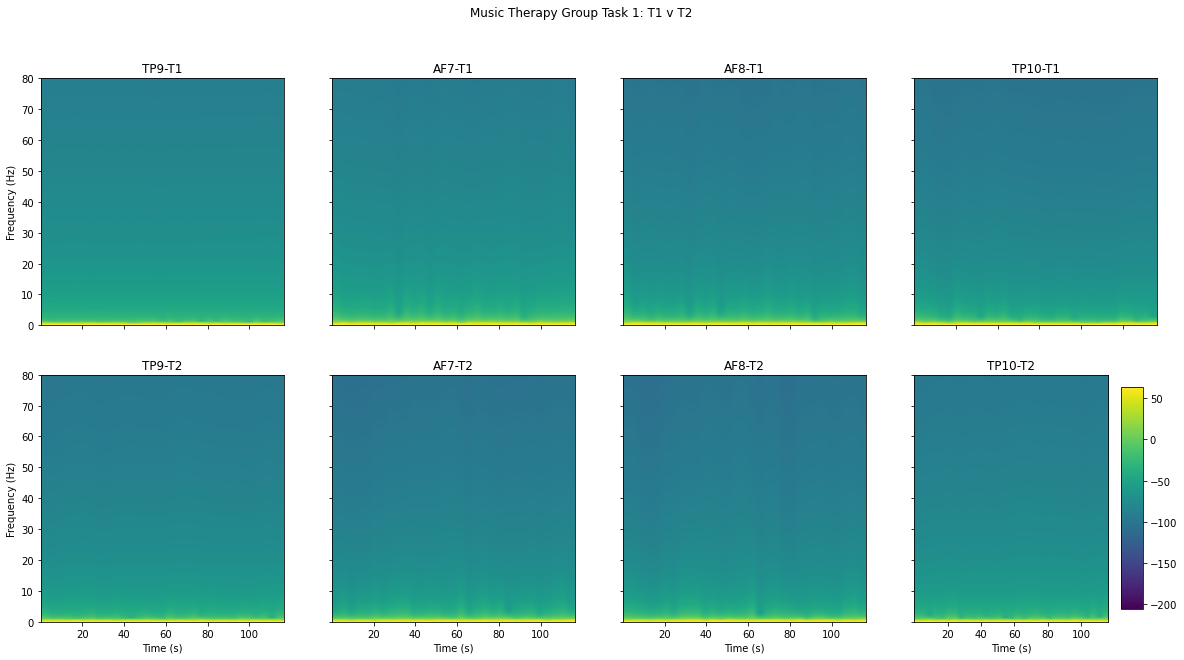

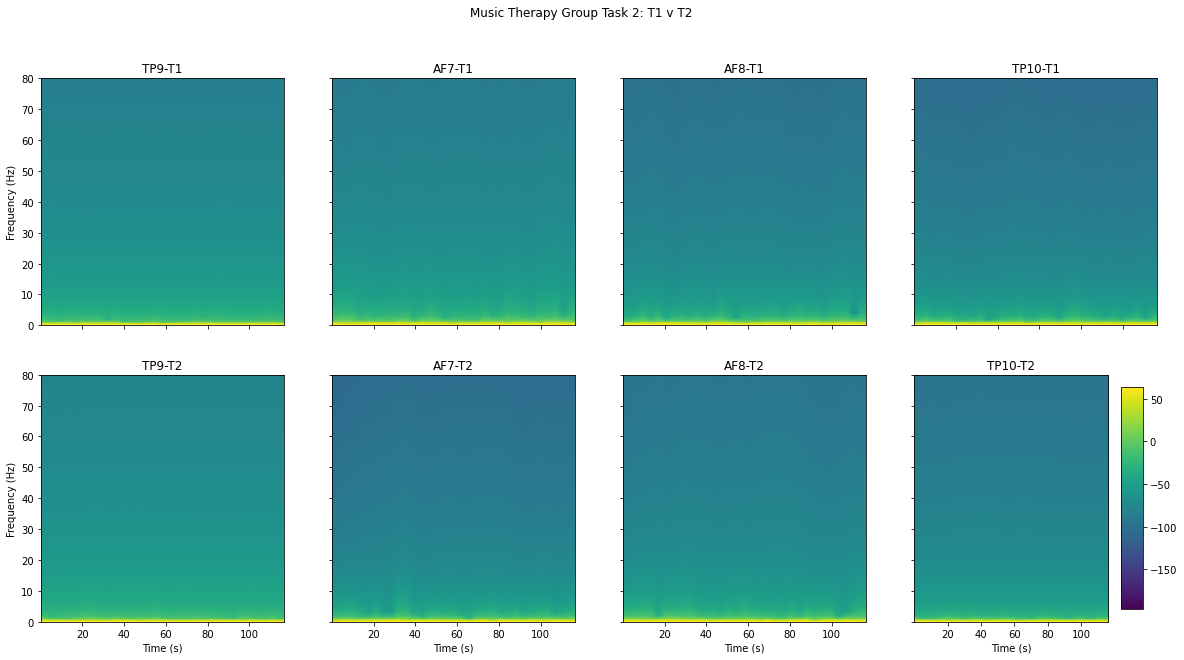

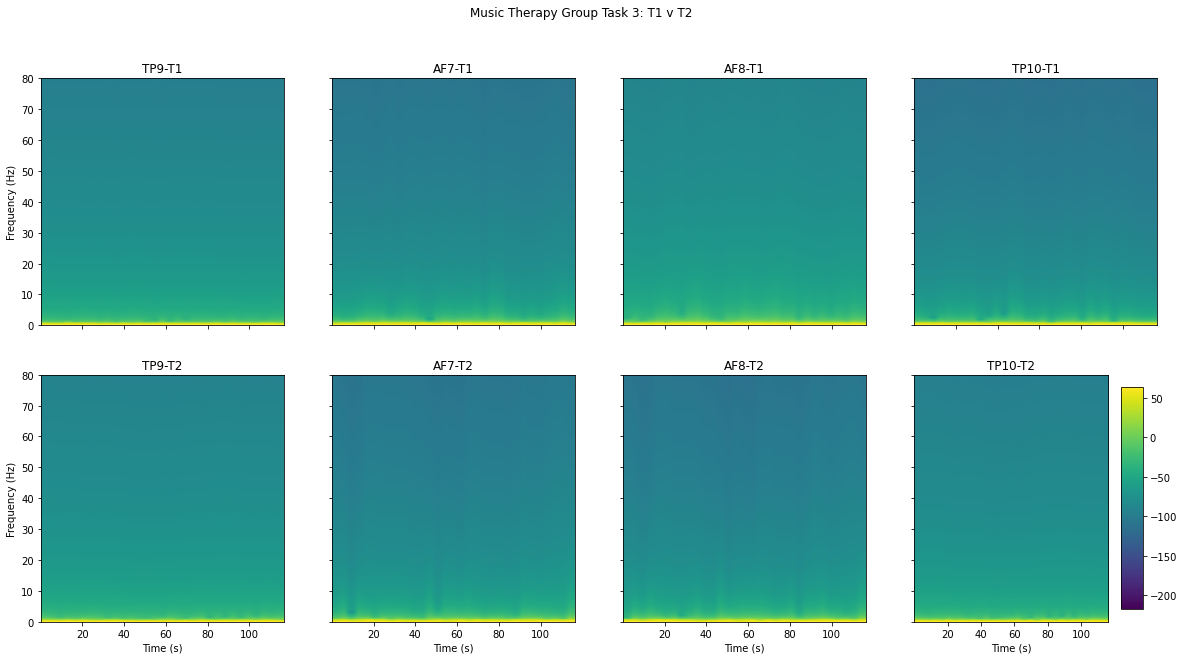

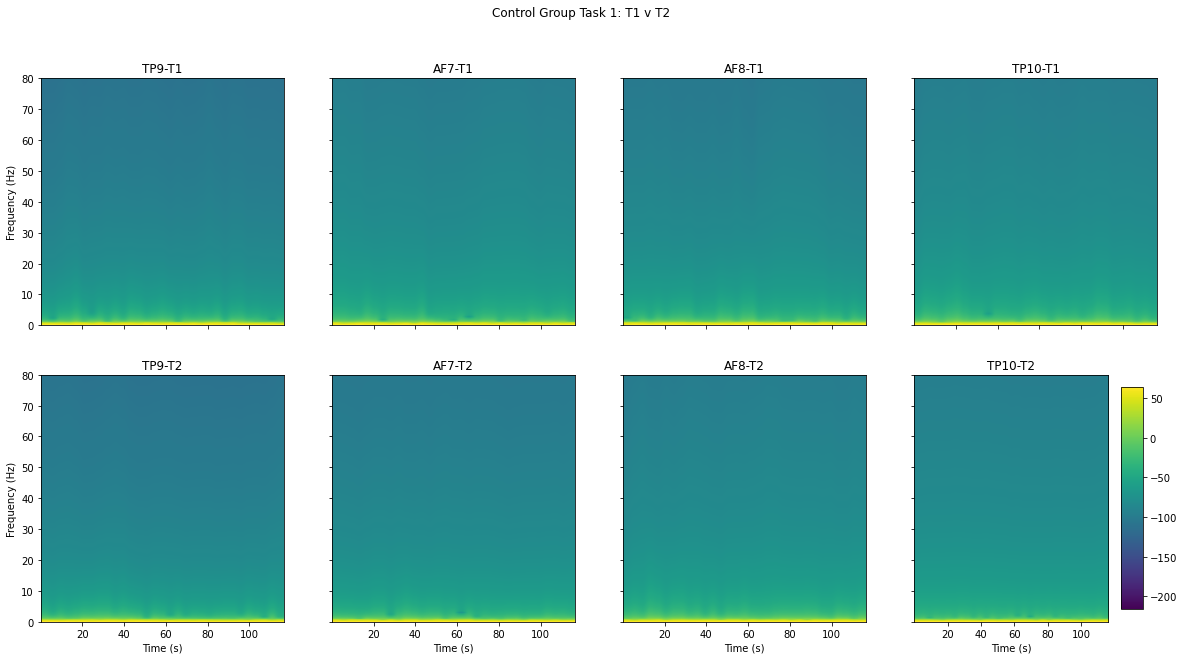

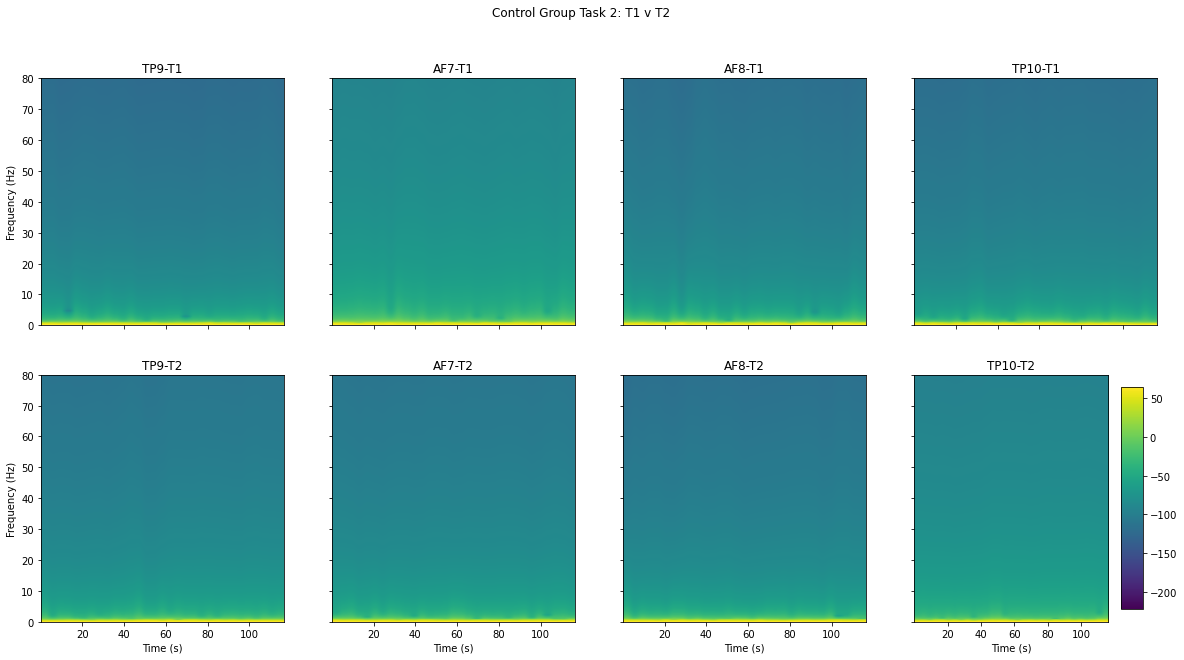

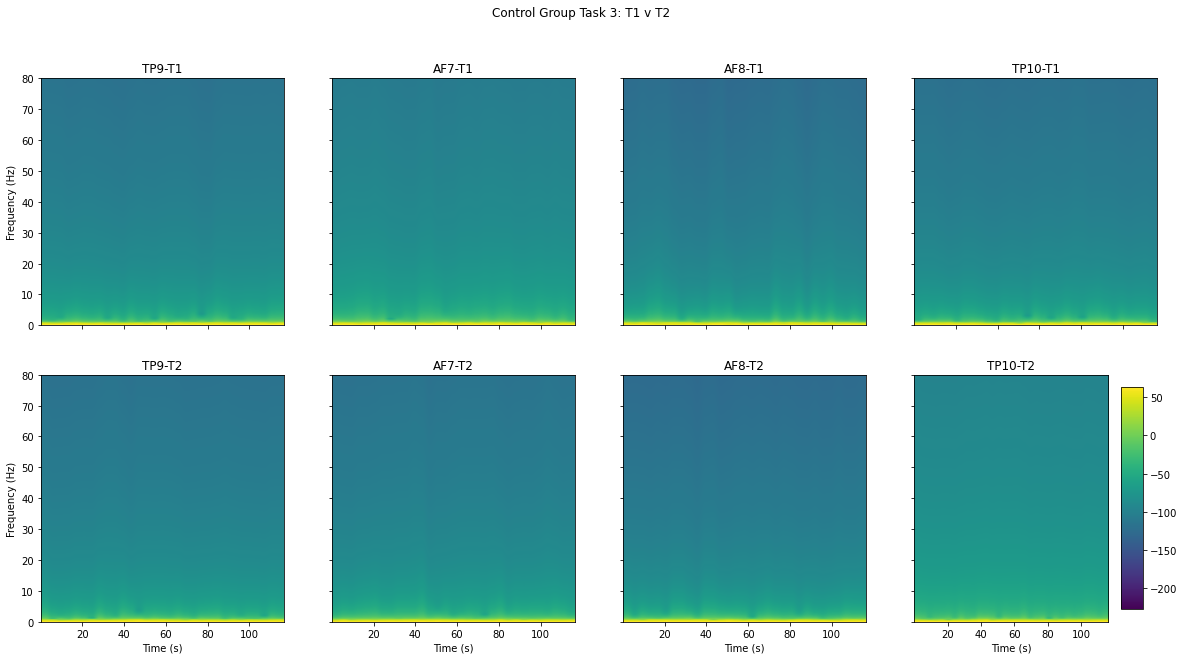

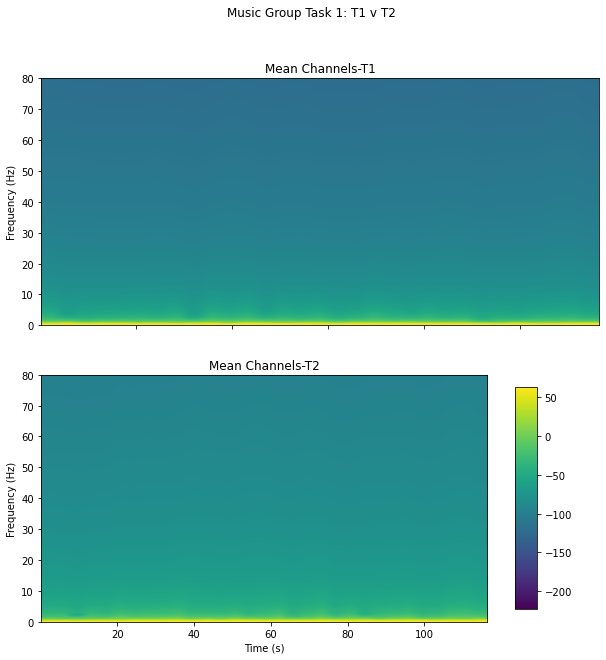

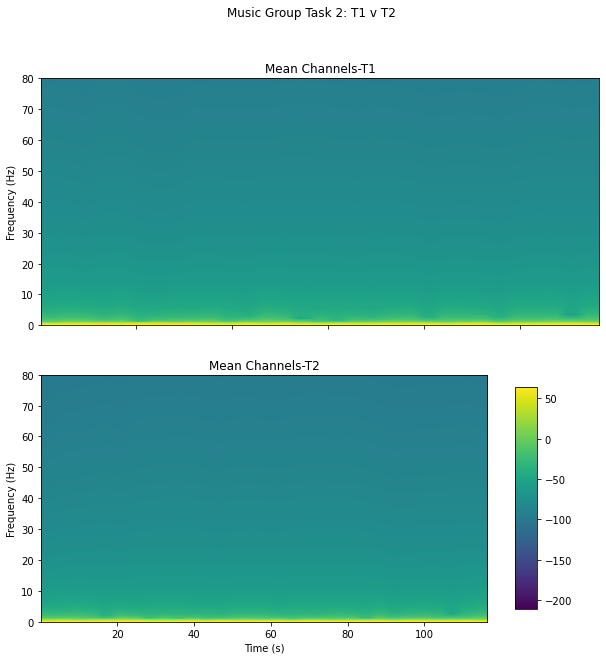

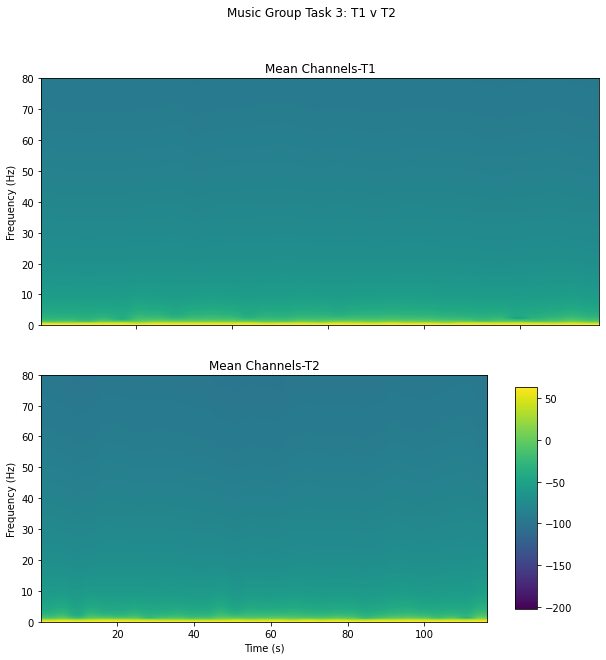

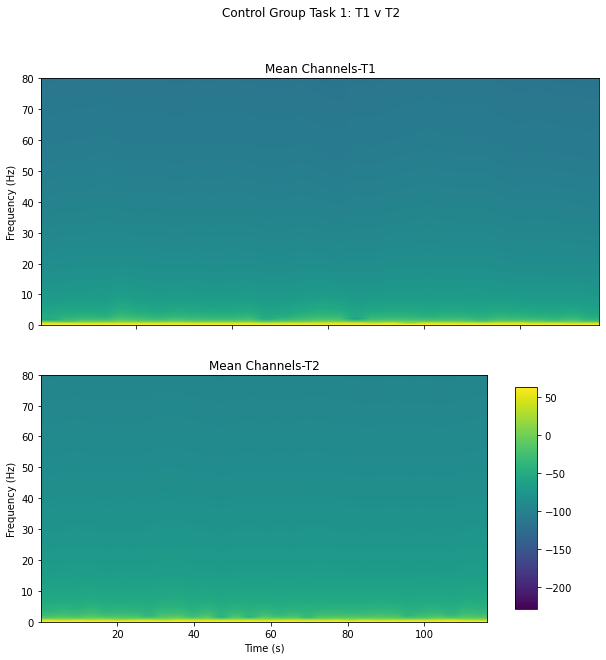

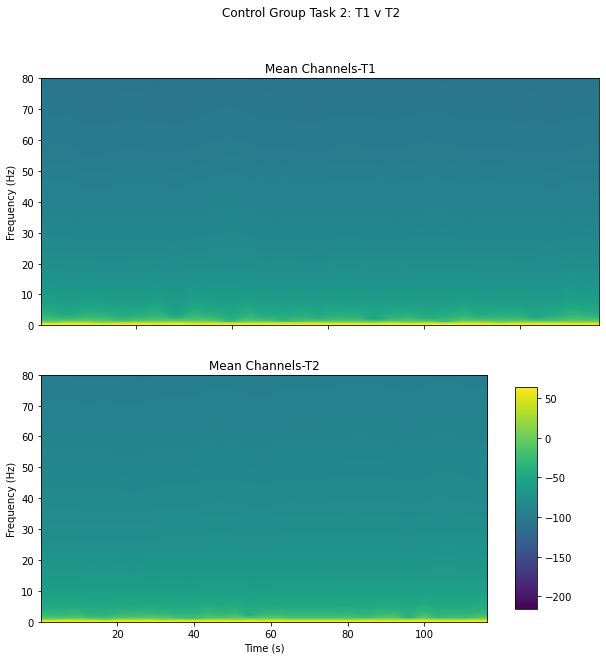

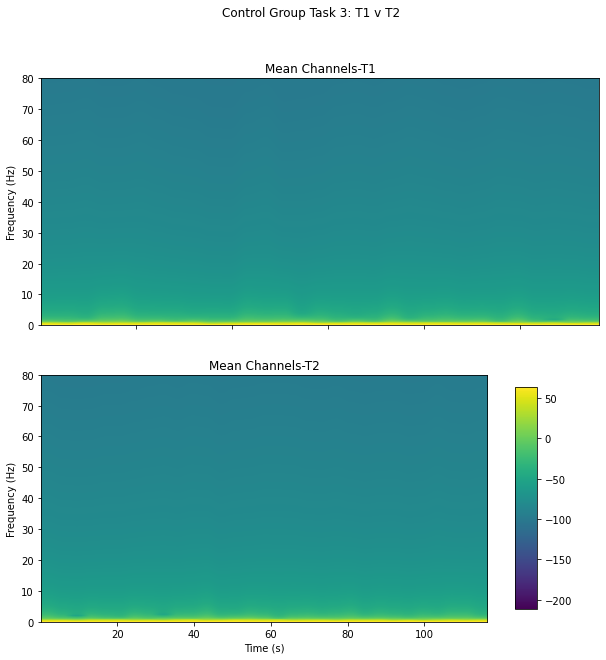

In [5]:
amp_MT11 = np.mean(MT11,axis=0)
amp_MT12 = np.mean(MT12,axis=0)
amp_MT13 = np.mean(MT13,axis=0)
amp_MT21 = np.mean(MT21,axis=0)
amp_MT22 = np.mean(MT22,axis=0)
amp_MT23 = np.mean(MT23,axis=0)
amp_CT11 = np.mean(CT11,axis=0)
amp_CT12 = np.mean(CT12,axis=0)
amp_CT13 = np.mean(CT13,axis=0)
amp_CT21 = np.mean(CT21,axis=0)
amp_CT22 = np.mean(CT22,axis=0)
amp_CT23 = np.mean(CT23,axis=0)
amp_mean_MT11 = np.mean(amp_MT11,axis=1)
amp_mean_MT11 = amp_mean_MT11.reshape(len(amp_mean_MT11),1)
amp_mean_MT12 = np.mean(amp_MT12,axis=1)
amp_mean_MT12 = amp_mean_MT12.reshape(len(amp_mean_MT12),1)
amp_mean_MT13 = np.mean(amp_MT13,axis=1)
amp_mean_MT13 = amp_mean_MT13.reshape(len(amp_mean_MT13),1)
amp_mean_MT21 = np.mean(amp_MT21,axis=1)
amp_mean_MT21 = amp_mean_MT21.reshape(len(amp_mean_MT21),1)
amp_mean_MT22 = np.mean(amp_MT22,axis=1)
amp_mean_MT22 = amp_mean_MT22.reshape(len(amp_mean_MT22),1)
amp_mean_MT23 = np.mean(amp_MT23,axis=1)
amp_mean_MT23 = amp_mean_MT23.reshape(len(amp_mean_MT23),1)
amp_mean_CT11 = np.mean(amp_CT11,axis=1)
amp_mean_CT11 = amp_mean_CT11.reshape(len(amp_mean_CT11),1)
amp_mean_CT12 = np.mean(amp_CT12,axis=1)
amp_mean_CT12 = amp_mean_CT12.reshape(len(amp_mean_CT12),1)
amp_mean_CT13 = np.mean(amp_CT13,axis=1)
amp_mean_CT13 = amp_mean_CT13.reshape(len(amp_mean_CT13),1)
amp_mean_CT21 = np.mean(amp_CT21,axis=1)
amp_mean_CT21 = amp_mean_CT21.reshape(len(amp_mean_CT21),1)
amp_mean_CT22 = np.mean(amp_CT22,axis=1)
amp_mean_CT22 = amp_mean_CT22.reshape(len(amp_mean_CT22),1)
amp_mean_CT23 = np.mean(amp_CT23,axis=1)
amp_mean_CT23 = amp_mean_CT23.reshape(len(amp_mean_CT23),1)

spectogramPlot((np.hstack((amp_MT11,amp_MT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((amp_MT12,amp_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((amp_MT13,amp_MT23))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 3: T1 v T2')
spectogramPlot((np.hstack((amp_CT11,amp_CT21))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((amp_CT12,amp_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((amp_CT13,amp_CT23))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 3: T1 v T2')
spectogramPlot((np.hstack((amp_mean_MT11,amp_mean_MT21))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 1: T1 v T2')
spectogramPlot((np.hstack((amp_mean_MT12,amp_mean_MT22))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 2: T1 v T2')
spectogramPlot((np.hstack((amp_mean_MT13,amp_mean_MT23))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 3: T1 v T2')
spectogramPlot((np.hstack((amp_mean_CT11,amp_mean_CT21))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((amp_mean_CT12,amp_mean_CT22))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((amp_mean_CT13,amp_mean_CT23))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 3: T1 v T2')



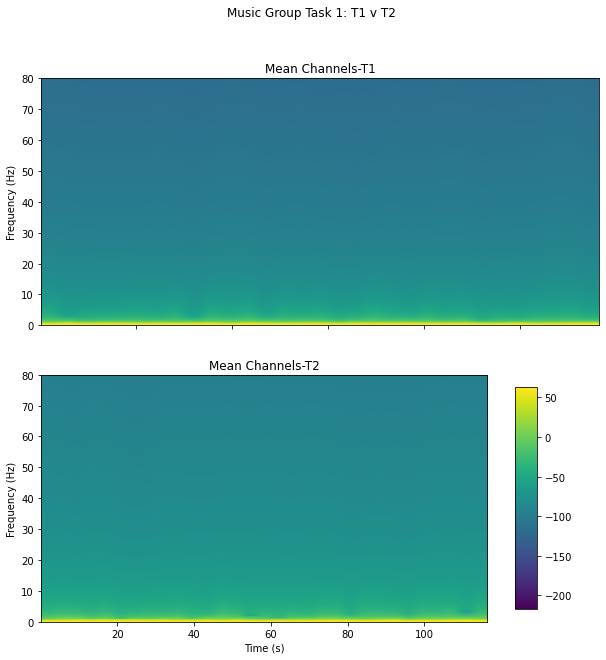

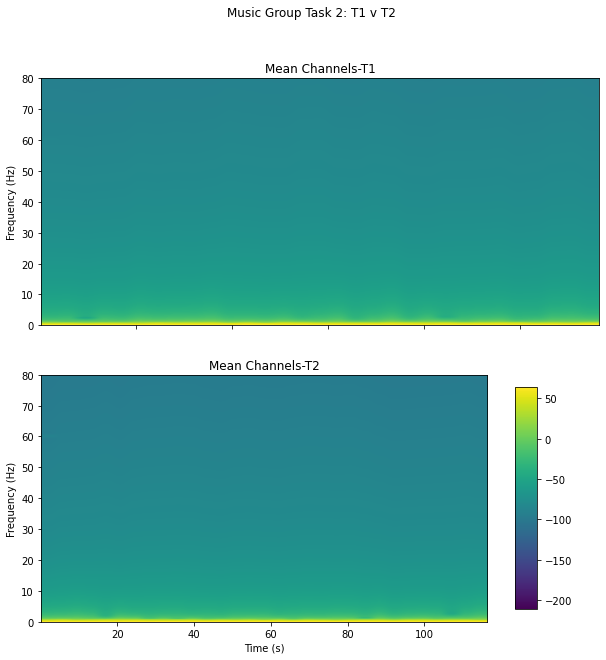

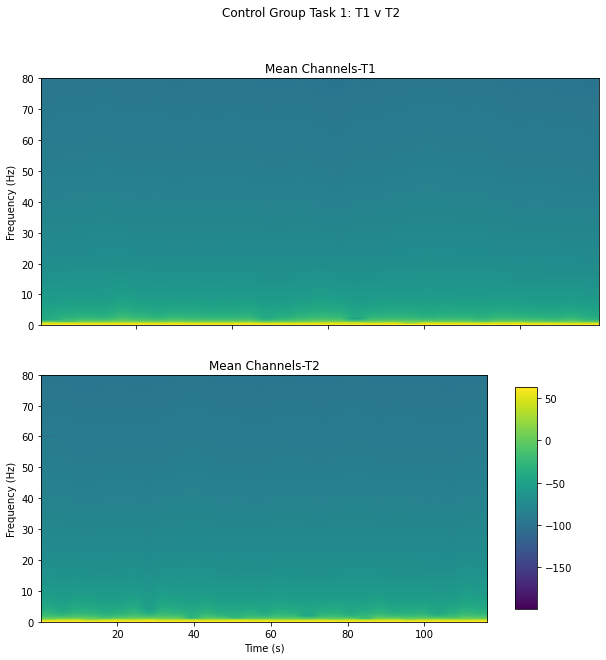

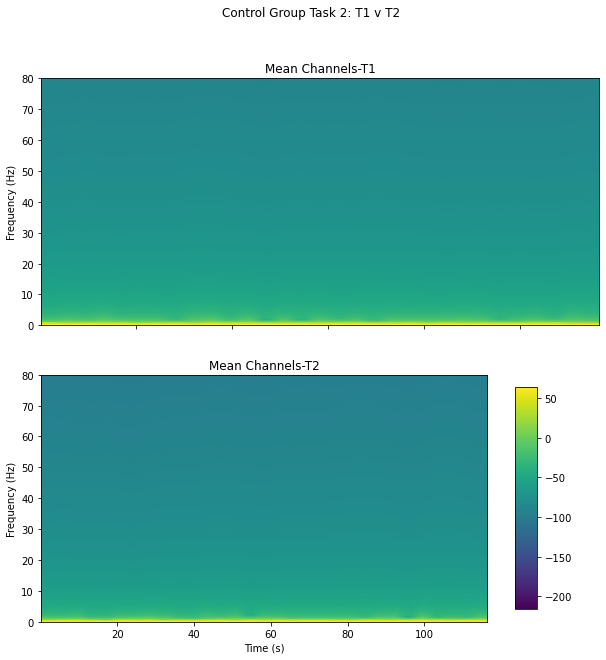

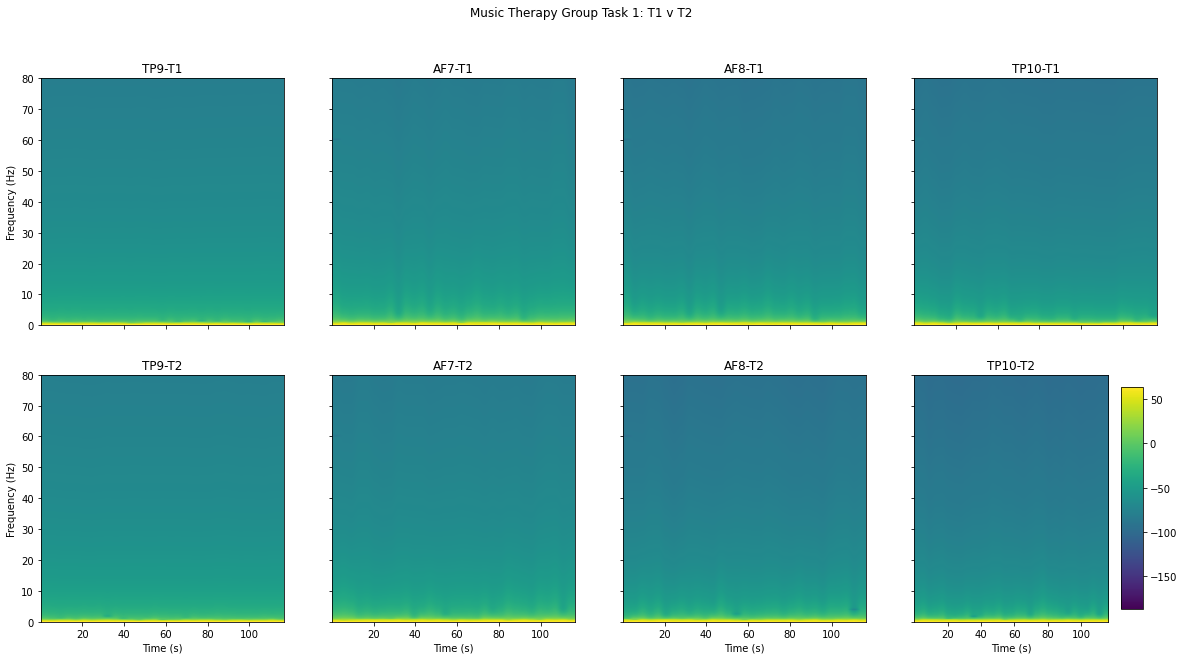

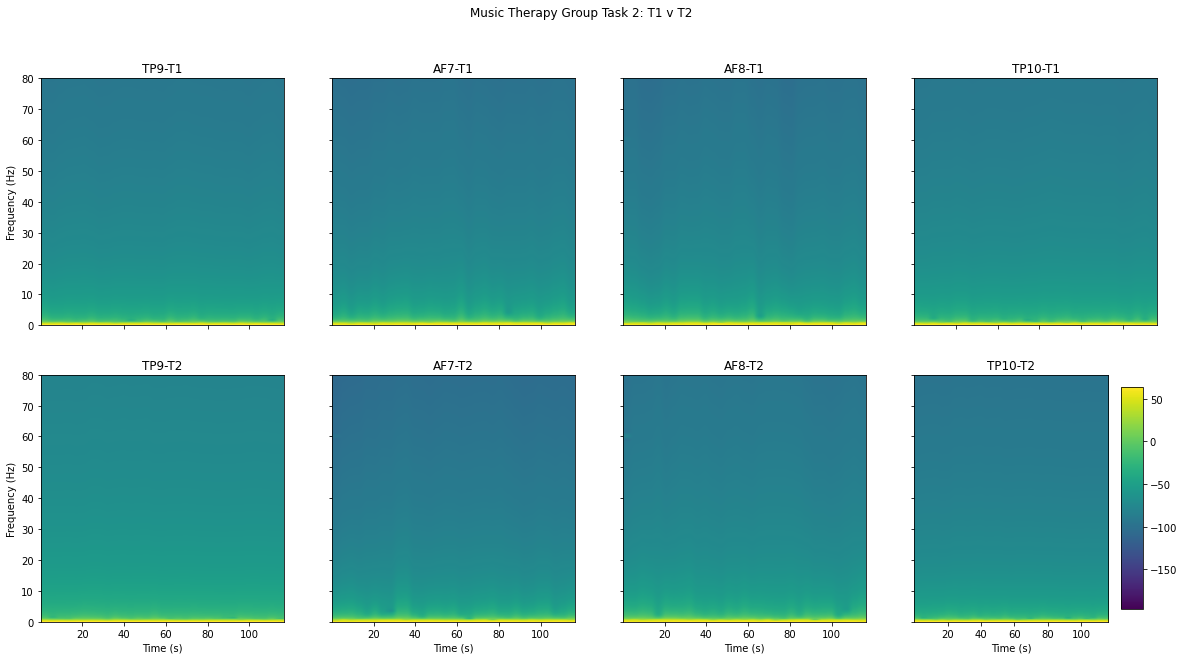

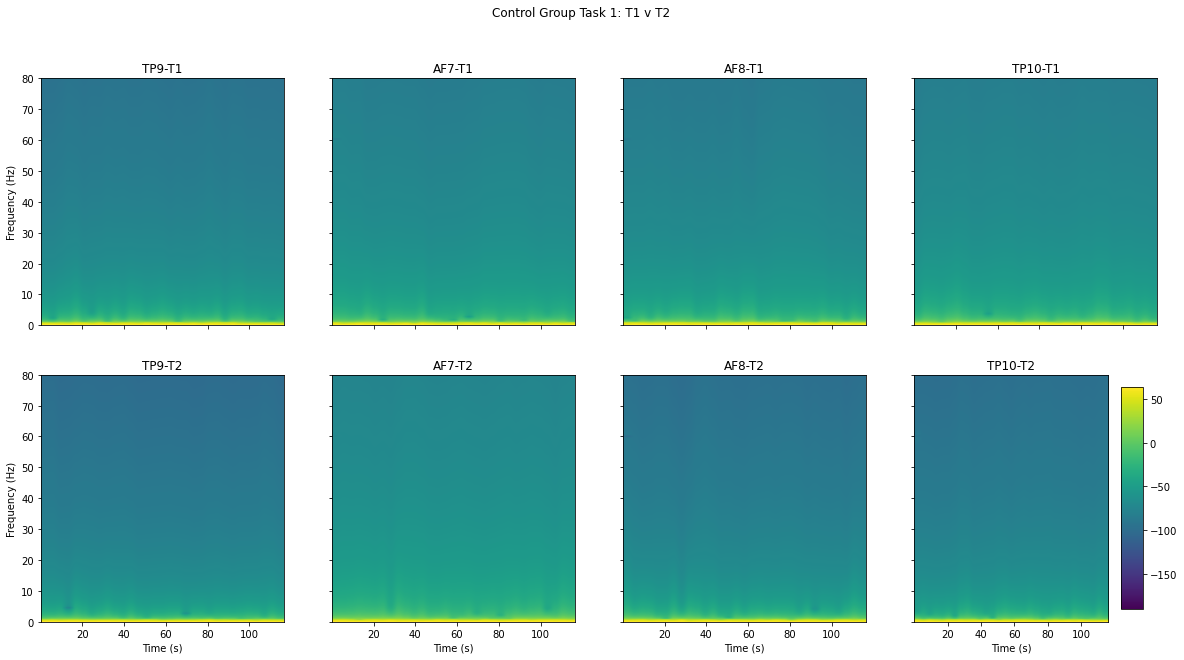

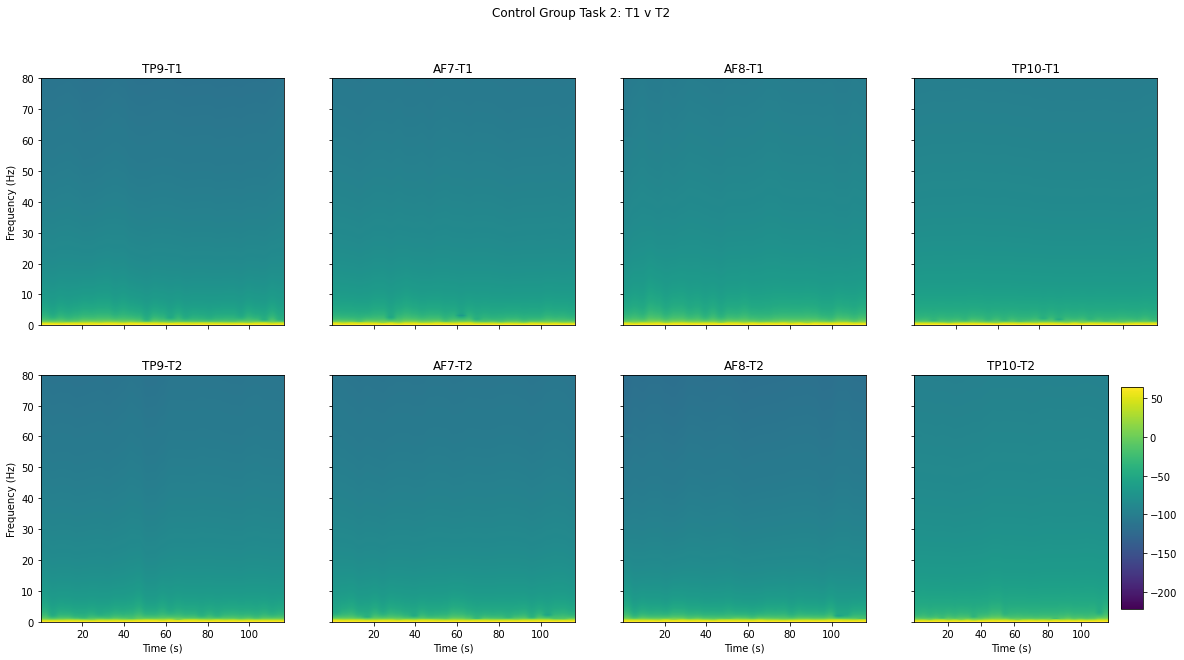

In [6]:
"notch filter the output files"
noc=filters()
notch_MT11,notch_MT12,notch_MT13,notch_MT21,notch_MT22,notch_MT23 = [],[],[],[],[],[]
notch_CT11,notch_CT12,notch_CT13,notch_CT21,notch_CT22,notch_CT23 = [],[],[],[],[],[]
for i in range(len(MT11)):
    notch_MT11.append(noc.notch(MT11[i,:,:],line,fs,Q))
    notch_MT12.append(noc.notch(MT12[i,:,:],line,fs,Q))
    notch_MT13.append(noc.notch(MT13[i,:,:],line,fs,Q))
    notch_MT21.append(noc.notch(MT21[i,:,:],line,fs,Q))
    notch_MT22.append(noc.notch(MT22[i,:,:],line,fs,Q))
    notch_MT23.append(noc.notch(MT23[i,:,:],line,fs,Q))
notch_MT11 = np.array(notch_MT11)
notch_MT12 = np.array(notch_MT12)
notch_MT13 = np.array(notch_MT13)
notch_MT21 = np.array(notch_MT21)
notch_MT22 = np.array(notch_MT22)
notch_MT23 = np.array(notch_MT23)
for j in range(len(CT11)):
    notch_CT11.append(noc.notch(CT11[j,:,:],line,fs,Q))
    notch_CT12.append(noc.notch(CT12[j,:,:],line,fs,Q))
    notch_CT13.append(noc.notch(CT13[j,:,:],line,fs,Q))
    notch_CT21.append(noc.notch(CT21[j,:,:],line,fs,Q))
    notch_CT22.append(noc.notch(CT22[j,:,:],line,fs,Q))
    notch_CT23.append(noc.notch(CT23[j,:,:],line,fs,Q))
notch_CT11 = np.array(notch_CT11)
notch_CT12 = np.array(notch_CT12)
notch_CT13 = np.array(notch_CT13)
notch_CT21 = np.array(notch_CT21)
notch_CT22 = np.array(notch_CT22)
notch_CT23 = np.array(notch_CT23)

"Develop spectogram plot"
mean_notch_MT11 = np.mean(notch_MT11,axis=0)
mean_notch_MT12 = np.mean(notch_MT12,axis=0)
mean_notch_MT21 = np.mean(notch_MT21,axis=0)
mean_notch_MT22 = np.mean(notch_MT22,axis=0)
mean_notch_CT11 = np.mean(notch_CT11,axis=0)
mean_notch_CT12 = np.mean(notch_CT12,axis=0)
mean_notch_CT21 = np.mean(notch_CT21,axis=0)
mean_notch_CT22 = np.mean(notch_CT22,axis=0)
mean_notch_MT11_channels = np.mean(mean_notch_MT11,axis=1)
mean_notch_MT11_channels = mean_notch_MT11_channels.reshape(mean_notch_MT11_channels.shape[0],1)
mean_notch_MT12_channels = np.mean(mean_notch_MT12,axis=1)
mean_notch_MT12_channels = mean_notch_MT12_channels.reshape(mean_notch_MT12_channels.shape[0],1)
mean_notch_MT21_channels = np.mean(mean_notch_MT21,axis=1)
mean_notch_MT21_channels = mean_notch_MT21_channels.reshape(mean_notch_MT21_channels.shape[0],1)
mean_notch_MT22_channels = np.mean(mean_notch_MT22,axis=1)
mean_notch_MT22_channels = mean_notch_MT22_channels.reshape(mean_notch_MT22_channels.shape[0],1)
mean_notch_CT11_channels = np.mean(mean_notch_CT11,axis=1)
mean_notch_CT11_channels = mean_notch_CT11_channels.reshape(mean_notch_CT11_channels.shape[0],1)
mean_notch_CT12_channels = np.mean(mean_notch_CT12,axis=1)
mean_notch_CT12_channels = mean_notch_CT12_channels.reshape(mean_notch_CT12_channels.shape[0],1)
mean_notch_CT21_channels = np.mean(mean_notch_CT21,axis=1)
mean_notch_CT21_channels = mean_notch_CT21_channels.reshape(mean_notch_CT21_channels.shape[0],1)
mean_notch_CT22_channels = np.mean(mean_notch_CT22,axis=1)
mean_notch_CT22_channels = mean_notch_CT22_channels.reshape(mean_notch_CT22_channels.shape[0],1)

spectogramPlot((np.hstack((mean_notch_MT11_channels,mean_notch_MT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_notch_MT21_channels,mean_notch_MT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_notch_CT11_channels,mean_notch_CT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_notch_CT21_channels,mean_notch_CT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_notch_MT11,mean_notch_MT12))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_notch_MT21,mean_notch_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_notch_CT11,mean_notch_CT12))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_notch_CT21,mean_notch_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')

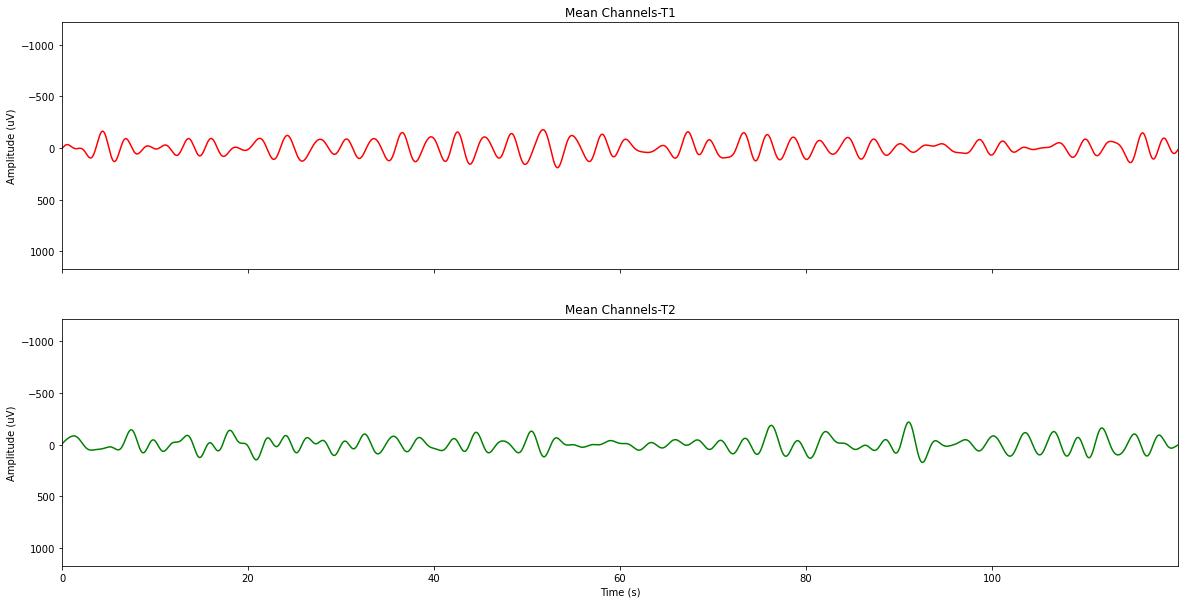

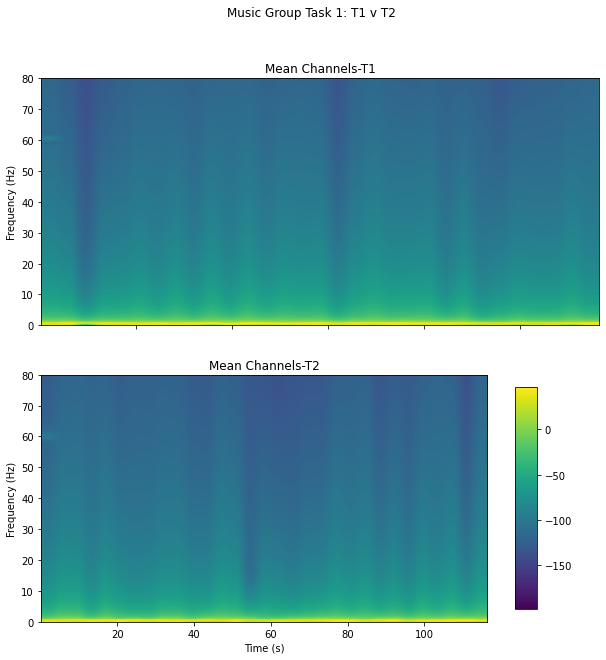

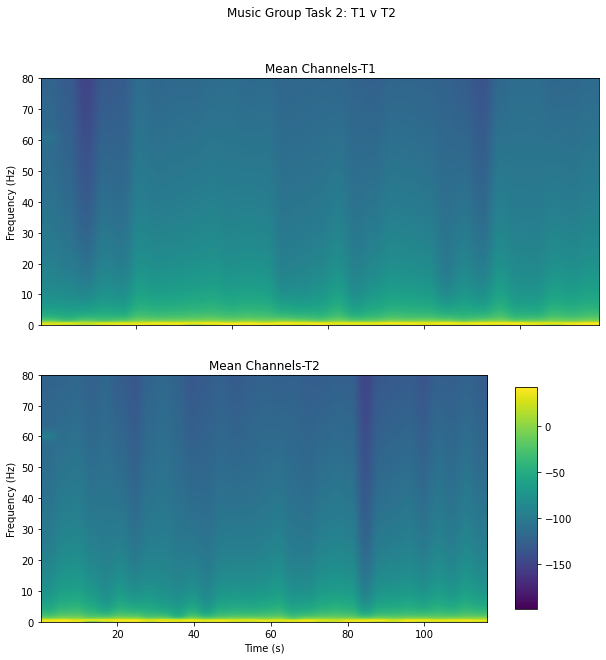

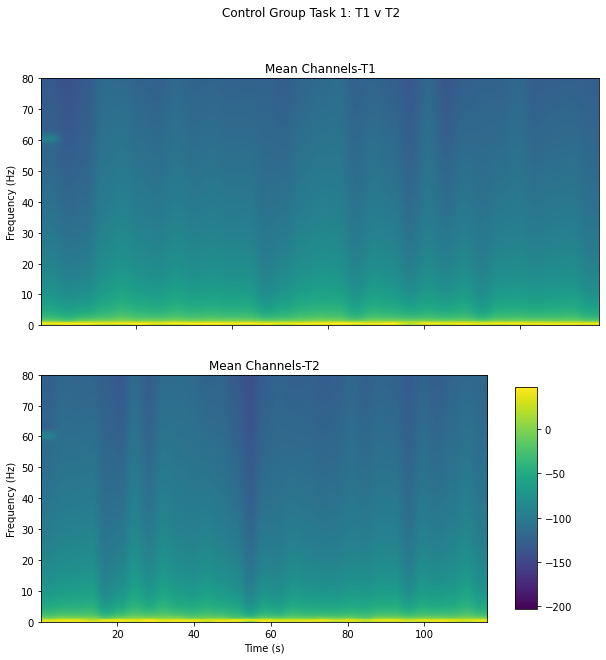

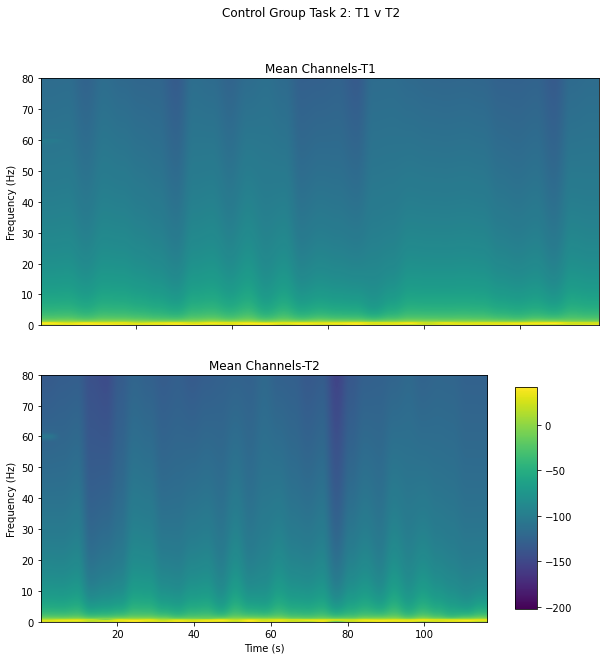

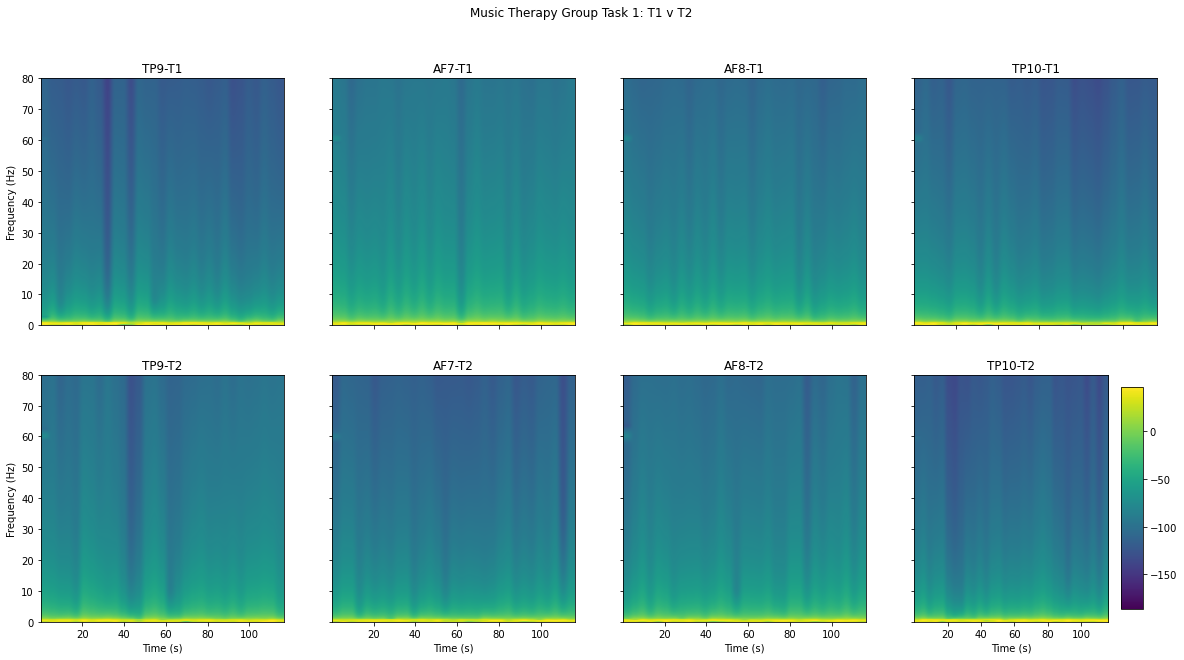

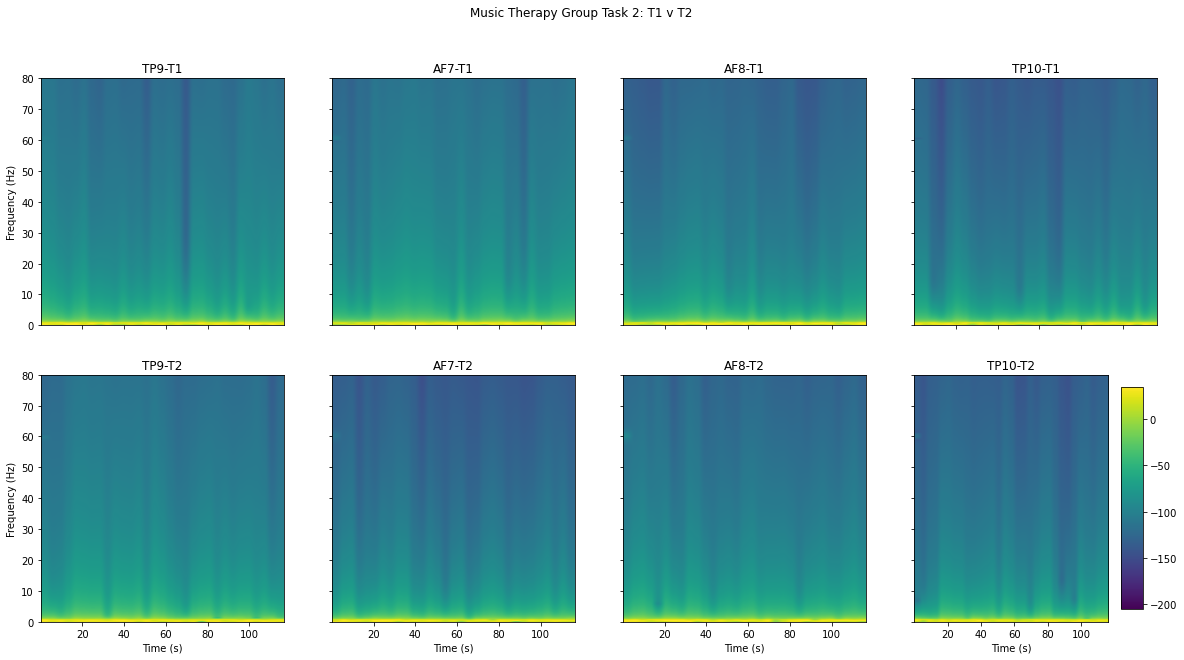

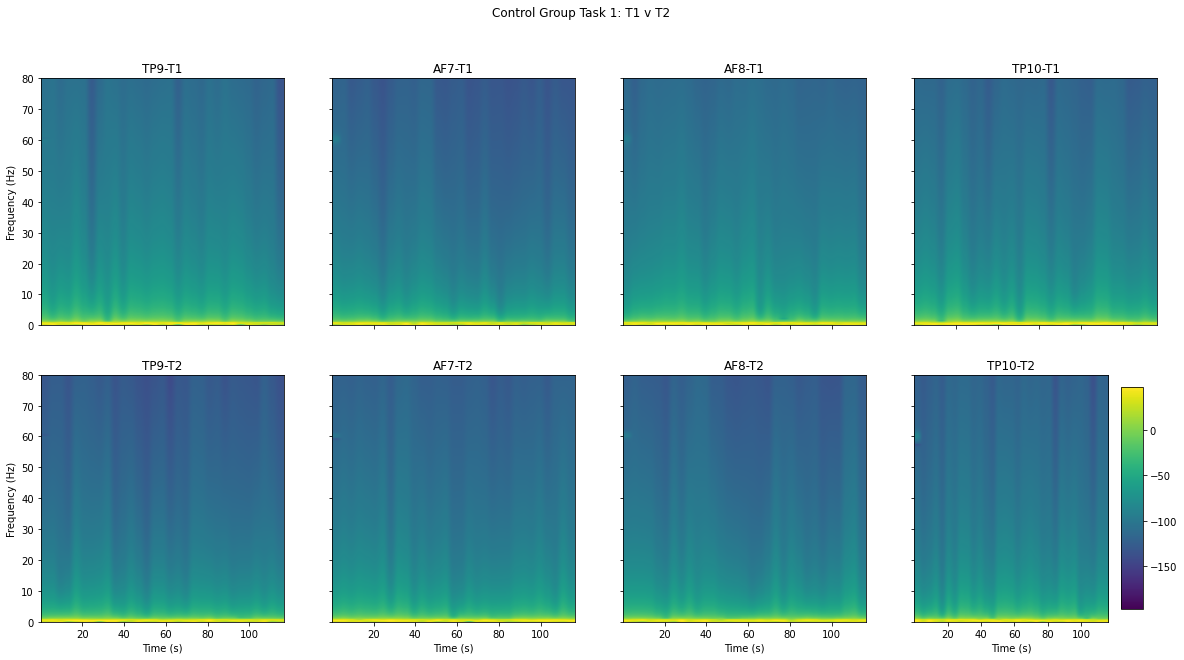

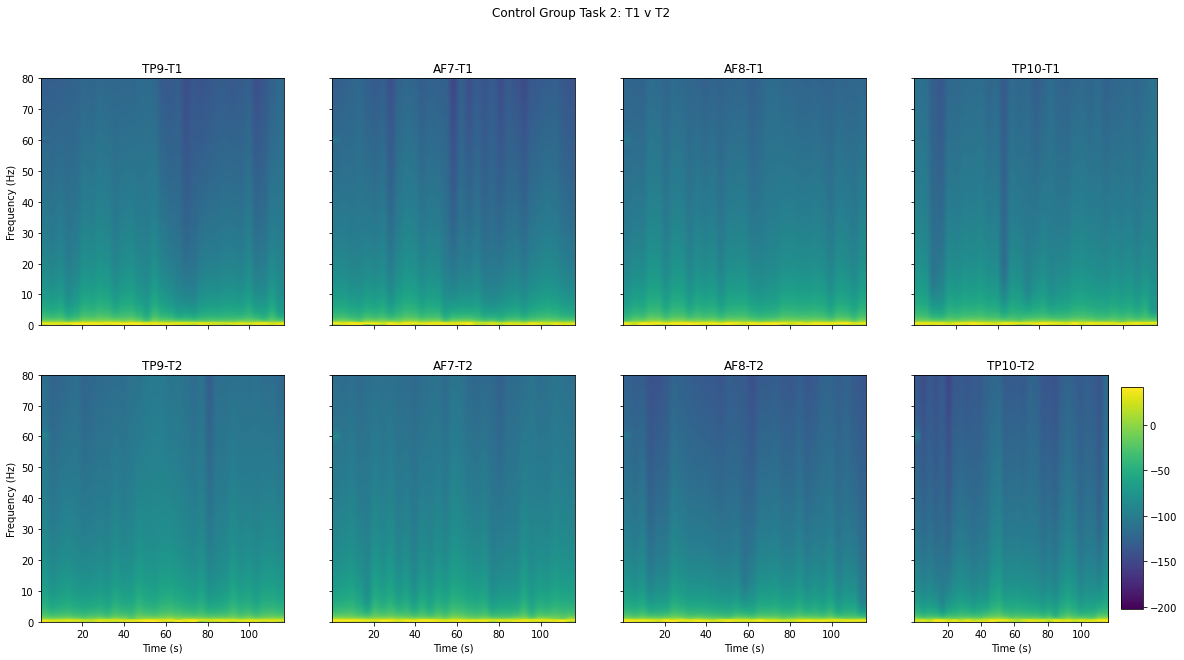

In [7]:
bp = filters()
bp_MT11 = []
bp_MT12 = []
bp_MT13 = []
bp_MT21 = []
bp_MT22 = []
bp_MT23 = []
bp_CT11 = []
bp_CT12 = []
bp_CT13 = []
bp_CT21 = []
bp_CT22 = []
bp_CT23 = []
for i in range(len(notch_MT11)):
    bp_MT11.append(bp.butterBandPass(notch_MT11[i],lowcut,highcut,fs,order))
    bp_MT12.append(bp.butterBandPass(notch_MT12[i],lowcut,highcut,fs,order))
    bp_MT13.append(bp.butterBandPass(notch_MT13[i],lowcut,highcut,fs,order))
    bp_MT21.append(bp.butterBandPass(notch_MT21[i],lowcut,highcut,fs,order))
    bp_MT22.append(bp.butterBandPass(notch_MT22[i],lowcut,highcut,fs,order))
    bp_MT23.append(bp.butterBandPass(notch_MT23[i],lowcut,highcut,fs,order))
    bp_CT11.append(bp.butterBandPass(notch_CT11[i],lowcut,highcut,fs,order))
    bp_CT12.append(bp.butterBandPass(notch_CT12[i],lowcut,highcut,fs,order))
    bp_CT13.append(bp.butterBandPass(notch_CT13[i],lowcut,highcut,fs,order))
    bp_CT21.append(bp.butterBandPass(notch_CT21[i],lowcut,highcut,fs,order))
    bp_CT22.append(bp.butterBandPass(notch_CT22[i],lowcut,highcut,fs,order))
    bp_CT23.append(bp.butterBandPass(notch_CT23[i],lowcut,highcut,fs,order))
bp_MT11 = np.array(bp_MT11)
bp_MT12 = np.array(bp_MT12)
bp_MT13 = np.array(bp_MT13)
bp_MT21 = np.array(bp_MT21)
bp_MT22 = np.array(bp_MT22)
bp_MT23 = np.array(bp_MT23)
bp_CT11 = np.array(bp_CT11)
bp_CT12 = np.array(bp_CT12)
bp_CT13 = np.array(bp_CT13)
bp_CT21 = np.array(bp_CT21)
bp_CT22 = np.array(bp_CT22)
bp_CT23 = np.array(bp_CT23)

"Develop spectogram plot"
mean_bp_MT11 = np.mean(bp_MT11,axis=0)
mean_bp_MT12 = np.mean(bp_MT12,axis=0)
mean_bp_MT13 = np.mean(bp_MT13,axis=0)
mean_bp_MT21 = np.mean(bp_MT21,axis=0)
mean_bp_MT22 = np.mean(bp_MT22,axis=0)
mean_bp_MT23 = np.mean(bp_MT23,axis=0)
mean_bp_CT11 = np.mean(bp_CT11,axis=0)
mean_bp_CT12 = np.mean(bp_CT12,axis=0)
mean_bp_CT13 = np.mean(bp_CT13,axis=0)
mean_bp_CT21 = np.mean(bp_CT21,axis=0)
mean_bp_CT22 = np.mean(bp_CT22,axis=0)
mean_bp_CT23 = np.mean(bp_CT23,axis=0)
mean_bp_MT11_channels = np.mean(mean_bp_MT11,axis=1)
mean_bp_MT11_channels = mean_bp_MT11_channels.reshape(mean_bp_MT11_channels.shape[0],1)
mean_bp_MT12_channels = np.mean(mean_bp_MT12,axis=1)
mean_bp_MT12_channels = mean_bp_MT12_channels.reshape(mean_bp_MT12_channels.shape[0],1)
mean_bp_MT13_channels = np.mean(mean_bp_MT13,axis=1)
mean_bp_MT13_channels = mean_bp_MT13_channels.reshape(mean_bp_MT13_channels.shape[0],1)
mean_bp_MT21_channels = np.mean(mean_bp_MT21,axis=1)
mean_bp_MT21_channels = mean_bp_MT21_channels.reshape(mean_bp_MT21_channels.shape[0],1)
mean_bp_MT22_channels = np.mean(mean_bp_MT22,axis=1)
mean_bp_MT22_channels = mean_bp_MT22_channels.reshape(mean_bp_MT22_channels.shape[0],1)
mean_bp_MT23_channels = np.mean(mean_bp_MT23,axis=1)
mean_bp_MT23_channels = mean_bp_MT23_channels.reshape(mean_bp_MT23_channels.shape[0],1)
mean_bp_CT11_channels = np.mean(mean_bp_CT11,axis=1)
mean_bp_CT11_channels = mean_bp_CT11_channels.reshape(mean_bp_CT11_channels.shape[0],1)
mean_bp_CT12_channels = np.mean(mean_bp_CT12,axis=1)
mean_bp_CT12_channels = mean_bp_CT12_channels.reshape(mean_bp_CT12_channels.shape[0],1)
mean_bp_CT13_channels = np.mean(mean_bp_CT13,axis=1)
mean_bp_CT13_channels = mean_bp_CT13_channels.reshape(mean_bp_CT13_channels.shape[0],1)
mean_bp_CT21_channels = np.mean(mean_bp_CT21,axis=1)
mean_bp_CT21_channels = mean_bp_CT21_channels.reshape(mean_bp_CT21_channels.shape[0],1)
mean_bp_CT22_channels = np.mean(mean_bp_CT22,axis=1)
mean_bp_CT22_channels = mean_bp_CT22_channels.reshape(mean_bp_CT22_channels.shape[0],1)
mean_bp_CT23_channels = np.mean(mean_bp_CT23,axis=1)
mean_bp_CT23_channels = mean_bp_CT23_channels.reshape(mean_bp_CT23_channels.shape[0],1)

plots(time_s,(np.hstack((mean_bp_MT11_channels,mean_bp_MT12_channels))),['Mean Channels-T1','Mean Channels-T2'],(20,10),['r','g'])
spectogramPlot((np.hstack((mean_bp_MT11_channels,mean_bp_MT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_MT21_channels,mean_bp_MT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Music Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT11_channels,mean_bp_CT12_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT21_channels,mean_bp_CT22_channels))),fs,nfft,noverlap,(10,10),['Mean Channels-T1','Mean Channels-T2'],'Control Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_bp_MT11,mean_bp_MT12))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_MT21,mean_bp_MT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Music Therapy Group Task 2: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT11,mean_bp_CT12))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 1: T1 v T2')
spectogramPlot((np.hstack((mean_bp_CT21,mean_bp_CT22))),fs,nfft,noverlap,(20,10),['TP9-T1','AF7-T1','AF8-T1','TP10-T1','TP9-T2','AF7-T2','AF8-T2','TP10-T2'],'Control Group Task 2: T1 v T2')   


In [8]:
"compute power spectrum of each window per channel"
delta_low = brainwaves['delta'][0]
delta_high = brainwaves['delta'][1]
theta_low = brainwaves['theta'][0]
theta_high = brainwaves['theta'][1]
alpha_low = brainwaves['alpha'][0]
alpha_high = brainwaves['alpha'][1]
beta_low = brainwaves['beta'][0]
beta_high = brainwaves['beta'][1]
gamma_low = brainwaves['gamma'][0]
gamma_high = brainwaves['gamma'][1]

In [9]:
"Compute the average band power for both the music therapy and control group"
#   compute average delta band power for both music therapy and control group
delta_MT11 = averageBandPower(bp_MT11.reshape(bp_MT11.shape[2],bp_MT11.shape[0],bp_MT11.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_MT12 = averageBandPower(bp_MT12.reshape(bp_MT12.shape[2],bp_MT12.shape[0],bp_MT12.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_MT13 = averageBandPower(bp_MT13.reshape(bp_MT13.shape[2],bp_MT13.shape[0],bp_MT13.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_MT21 = averageBandPower(bp_MT21.reshape(bp_MT21.shape[2],bp_MT21.shape[0],bp_MT21.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_MT22 = averageBandPower(bp_MT22.reshape(bp_MT22.shape[2],bp_MT22.shape[0],bp_MT22.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_MT23 = averageBandPower(bp_MT23.reshape(bp_MT23.shape[2],bp_MT23.shape[0],bp_MT23.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_CT11 = averageBandPower(bp_CT11.reshape(bp_CT11.shape[2],bp_CT11.shape[0],bp_CT11.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_CT12 = averageBandPower(bp_CT12.reshape(bp_CT12.shape[2],bp_CT12.shape[0],bp_CT12.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_CT13 = averageBandPower(bp_CT13.reshape(bp_CT13.shape[2],bp_CT13.shape[0],bp_CT13.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_CT21 = averageBandPower(bp_CT21.reshape(bp_CT21.shape[2],bp_CT21.shape[0],bp_CT21.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_CT22 = averageBandPower(bp_CT22.reshape(bp_CT22.shape[2],bp_CT22.shape[0],bp_CT22.shape[1]),'3D',fs,delta_low,delta_high,win)
delta_CT23 = averageBandPower(bp_CT23.reshape(bp_CT23.shape[2],bp_CT23.shape[0],bp_CT23.shape[1]),'3D',fs,delta_low,delta_high,win)

#   compute average theta band power for both music therapy and control group
theta_MT11 = averageBandPower(bp_MT11.reshape(bp_MT11.shape[2],bp_MT11.shape[0],bp_MT11.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_MT12 = averageBandPower(bp_MT12.reshape(bp_MT12.shape[2],bp_MT12.shape[0],bp_MT12.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_MT13 = averageBandPower(bp_MT13.reshape(bp_MT13.shape[2],bp_MT13.shape[0],bp_MT13.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_MT21 = averageBandPower(bp_MT21.reshape(bp_MT21.shape[2],bp_MT21.shape[0],bp_MT21.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_MT22 = averageBandPower(bp_MT22.reshape(bp_MT22.shape[2],bp_MT22.shape[0],bp_MT22.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_MT23 = averageBandPower(bp_MT23.reshape(bp_MT23.shape[2],bp_MT23.shape[0],bp_MT23.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_CT11 = averageBandPower(bp_CT11.reshape(bp_CT11.shape[2],bp_CT11.shape[0],bp_CT11.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_CT12 = averageBandPower(bp_CT12.reshape(bp_CT12.shape[2],bp_CT12.shape[0],bp_CT12.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_CT13 = averageBandPower(bp_CT13.reshape(bp_CT13.shape[2],bp_CT13.shape[0],bp_CT13.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_CT21 = averageBandPower(bp_CT21.reshape(bp_CT21.shape[2],bp_CT21.shape[0],bp_CT21.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_CT22 = averageBandPower(bp_CT22.reshape(bp_CT22.shape[2],bp_CT22.shape[0],bp_CT22.shape[1]),'3D',fs,theta_low,theta_high,win)
theta_CT23 = averageBandPower(bp_CT23.reshape(bp_CT23.shape[2],bp_CT23.shape[0],bp_CT23.shape[1]),'3D',fs,theta_low,theta_high,win)

#   compute average alpha band power for both music therapy and control group
alpha_MT11 = averageBandPower(bp_MT11.reshape(bp_MT11.shape[2],bp_MT11.shape[0],bp_MT11.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_MT12 = averageBandPower(bp_MT12.reshape(bp_MT12.shape[2],bp_MT12.shape[0],bp_MT12.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_MT13 = averageBandPower(bp_MT13.reshape(bp_MT13.shape[2],bp_MT13.shape[0],bp_MT13.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_MT21 = averageBandPower(bp_MT21.reshape(bp_MT21.shape[2],bp_MT21.shape[0],bp_MT21.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_MT22 = averageBandPower(bp_MT22.reshape(bp_MT22.shape[2],bp_MT22.shape[0],bp_MT22.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_MT23 = averageBandPower(bp_MT23.reshape(bp_MT23.shape[2],bp_MT23.shape[0],bp_MT23.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_CT11 = averageBandPower(bp_CT11.reshape(bp_CT11.shape[2],bp_CT11.shape[0],bp_CT11.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_CT12 = averageBandPower(bp_CT12.reshape(bp_CT12.shape[2],bp_CT12.shape[0],bp_CT12.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_CT13 = averageBandPower(bp_CT13.reshape(bp_CT13.shape[2],bp_CT13.shape[0],bp_CT13.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_CT21 = averageBandPower(bp_CT21.reshape(bp_CT21.shape[2],bp_CT21.shape[0],bp_CT21.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_CT22 = averageBandPower(bp_CT22.reshape(bp_CT22.shape[2],bp_CT22.shape[0],bp_CT22.shape[1]),'3D',fs,alpha_low,alpha_high,win)
alpha_CT23 = averageBandPower(bp_CT23.reshape(bp_CT23.shape[2],bp_CT23.shape[0],bp_CT23.shape[1]),'3D',fs,alpha_low,alpha_high,win)

#   compute average beta band power for both music therapy and control group
beta_MT11 = averageBandPower(bp_MT11.reshape(bp_MT11.shape[2],bp_MT11.shape[0],bp_MT11.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_MT12 = averageBandPower(bp_MT12.reshape(bp_MT12.shape[2],bp_MT12.shape[0],bp_MT12.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_MT13 = averageBandPower(bp_MT13.reshape(bp_MT13.shape[2],bp_MT13.shape[0],bp_MT13.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_MT21 = averageBandPower(bp_MT21.reshape(bp_MT21.shape[2],bp_MT21.shape[0],bp_MT21.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_MT22 = averageBandPower(bp_MT22.reshape(bp_MT22.shape[2],bp_MT22.shape[0],bp_MT22.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_MT23 = averageBandPower(bp_MT23.reshape(bp_MT23.shape[2],bp_MT23.shape[0],bp_MT23.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_CT11 = averageBandPower(bp_CT11.reshape(bp_CT11.shape[2],bp_CT11.shape[0],bp_CT11.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_CT12 = averageBandPower(bp_CT12.reshape(bp_CT12.shape[2],bp_CT12.shape[0],bp_CT12.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_CT13 = averageBandPower(bp_CT13.reshape(bp_CT13.shape[2],bp_CT13.shape[0],bp_CT13.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_CT21 = averageBandPower(bp_CT21.reshape(bp_CT21.shape[2],bp_CT21.shape[0],bp_CT21.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_CT22 = averageBandPower(bp_CT22.reshape(bp_CT22.shape[2],bp_CT22.shape[0],bp_CT22.shape[1]),'3D',fs,beta_low,beta_high,win)
beta_CT23 = averageBandPower(bp_CT23.reshape(bp_CT23.shape[2],bp_CT23.shape[0],bp_CT23.shape[1]),'3D',fs,beta_low,beta_high,win)

#   compute average gamma band power for both music therapy and control group
gamma_MT11 = averageBandPower(bp_MT11.reshape(bp_MT11.shape[2],bp_MT11.shape[0],bp_MT11.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_MT12 = averageBandPower(bp_MT12.reshape(bp_MT12.shape[2],bp_MT12.shape[0],bp_MT12.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_MT13 = averageBandPower(bp_MT13.reshape(bp_MT13.shape[2],bp_MT13.shape[0],bp_MT13.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_MT21 = averageBandPower(bp_MT21.reshape(bp_MT21.shape[2],bp_MT21.shape[0],bp_MT21.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_MT22 = averageBandPower(bp_MT22.reshape(bp_MT22.shape[2],bp_MT22.shape[0],bp_MT22.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_MT23 = averageBandPower(bp_MT23.reshape(bp_MT23.shape[2],bp_MT23.shape[0],bp_MT23.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_CT11 = averageBandPower(bp_CT11.reshape(bp_CT11.shape[2],bp_CT11.shape[0],bp_CT11.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_CT12 = averageBandPower(bp_CT12.reshape(bp_CT12.shape[2],bp_CT12.shape[0],bp_CT12.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_CT13 = averageBandPower(bp_CT13.reshape(bp_CT13.shape[2],bp_CT13.shape[0],bp_CT13.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_CT21 = averageBandPower(bp_CT21.reshape(bp_CT21.shape[2],bp_CT21.shape[0],bp_CT21.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_CT22 = averageBandPower(bp_CT22.reshape(bp_CT22.shape[2],bp_CT22.shape[0],bp_CT22.shape[1]),'3D',fs,gamma_low,gamma_high,win)
gamma_CT23 = averageBandPower(bp_CT23.reshape(bp_CT23.shape[2],bp_CT23.shape[0],bp_CT23.shape[1]),'3D',fs,gamma_low,gamma_high,win)

#   compute average theta to beta ratio for both music therapy and control group
theta_beta_MT11 = theta_MT11/beta_MT11
theta_beta_MT12 = theta_MT12/beta_MT12
theta_beta_MT13 = theta_MT13/beta_MT13
theta_beta_MT21 = theta_MT21/beta_MT21
theta_beta_MT22 = theta_MT22/beta_MT22
theta_beta_MT23 = theta_MT23/beta_MT23
theta_beta_CT11 = theta_CT11/beta_CT11
theta_beta_CT12 = theta_CT12/beta_CT12
theta_beta_CT13 = theta_CT13/beta_CT13
theta_beta_CT21 = theta_CT21/beta_CT21
theta_beta_CT22 = theta_CT22/beta_CT22
theta_beta_CT23 = theta_CT23/beta_CT23
#   compute average alpha to beta ratio for both music therapy and control group
alpha_beta_MT11 = alpha_MT11/beta_MT11
alpha_beta_MT12 = alpha_MT12/beta_MT12
alpha_beta_MT13 = alpha_MT13/beta_MT13
alpha_beta_MT21 = alpha_MT21/beta_MT21
alpha_beta_MT22 = alpha_MT22/beta_MT22
alpha_beta_MT23 = alpha_MT23/beta_MT23
alpha_beta_CT11 = alpha_CT11/beta_CT11
alpha_beta_CT12 = alpha_CT12/beta_CT12
alpha_beta_CT13 = alpha_CT13/beta_CT13
alpha_beta_CT21 = alpha_CT21/beta_CT21
alpha_beta_CT22 = alpha_CT22/beta_CT22
alpha_beta_CT23 = alpha_CT23/beta_CT23

In [10]:
#   compute average delta band power for both music therapy and control group
data_pre = np.vstack((delta_CT11,delta_CT12,delta_CT13,delta_MT11,delta_MT12,delta_MT13,
                    theta_CT11,theta_CT12,theta_CT13,theta_MT11,theta_MT12,theta_MT13,
                    alpha_CT11,alpha_CT12,alpha_CT13,beta_CT11,alpha_MT11,alpha_MT12,alpha_MT13,
                    beta_CT11,beta_CT12,beta_CT13,beta_MT11,beta_MT12,beta_MT13,
                    gamma_CT11,gamma_CT12,gamma_CT13,gamma_MT11,gamma_MT12,gamma_MT13,
                    theta_beta_MT11,theta_beta_MT12,theta_beta_MT13,theta_beta_CT11,theta_beta_CT12,theta_beta_CT13,
                    alpha_beta_MT11,alpha_beta_MT12,alpha_beta_MT13,alpha_beta_CT11,alpha_beta_CT12,alpha_beta_CT13,))

data_post = np.vstack((delta_CT21,delta_CT22,delta_CT23,delta_MT21,delta_MT22,delta_MT23,
                    theta_CT21,theta_CT22,theta_CT23,theta_MT21,theta_MT22,theta_MT23,
                    alpha_CT21,alpha_CT22,alpha_CT23,beta_CT21,alpha_MT21,alpha_MT22,alpha_MT23,
                    beta_CT21,beta_CT22,beta_CT23,beta_MT21,beta_MT22,beta_MT23,
                    gamma_CT21,gamma_CT22,gamma_CT23,gamma_MT21,gamma_MT22,gamma_MT23,
                    theta_beta_MT21,theta_beta_MT22,theta_beta_MT23,theta_beta_CT21,theta_beta_CT22,theta_beta_CT23,
                    alpha_beta_MT21,alpha_beta_MT22,alpha_beta_MT23,alpha_beta_CT21,alpha_beta_CT22,alpha_beta_CT23,))
                    
data_pre = np.hstack((data_pre[:,0],data_pre[:,1],data_pre[:,2],data_pre[:,3]))
data_post = np.hstack((data_post[:,0],data_post[:,1],data_post[:,2],data_post[:,3]))
diff = data_pre - data_post
test_1 = normalityTest(diff)

....Executing Shapiro Wilks Test.......... 

Shapiro Wilks Test: data is not normally distributed, P-Value= 0.0

....confirming Shapiro Wilks Test non-normality result with D’Agostino’s K^2 test.......

Executing D’Agostino’s K^2 Test...
D’Agostino’s K^2 Test: data is not normally distributed, P-Value= 3.283768486717373e-161

....confirming D’Agostino’s K^2 Test non-normality result with Anderson-Darling Test.......

Executing Anderson-Darling Test...
Statistic: 232.368
15.000: 0.573, Anderson-Darling Test: data is not normally distributed
10.000: 0.653, Anderson-Darling Test: data is not normally distributed
5.000: 0.783, Anderson-Darling Test: data is not normally distributed
2.500: 0.914, Anderson-Darling Test: data is not normally distributed
1.000: 1.087, Anderson-Darling Test: data is not normally distributed

 Wilcoxon Signed Test utilized to evaluate significance of data


In [11]:
"""
Compute Wilcoxon Signed Test for the difference between the average delta band power for the two groups
Coding Example:
                MT12 = MUSIC THERAPY (GROUP 1,GROUP 2)
                CT12 = CONTROL (GROUP 1,GROUP 2)
"""
test_type = test_1
#   compute paired t-test for the difference between the average delta band power for the two groups
print ('DELTA BAND')
ttest_delta_MT1121 = statTest(test_type,delta_MT11,delta_MT21, show_output=True,variableName='delta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_MT1222 = statTest(test_type,delta_MT12,delta_MT22, show_output=True,variableName='delta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_MT1323 = statTest(test_type,delta_MT13,delta_MT23, show_output=True,variableName='delta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1121 = statTest(test_type,delta_CT11,delta_CT21, show_output=True,variableName='delta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1222 = statTest(test_type,delta_CT12,delta_CT22, show_output=True,variableName='delta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_delta_CT1323 = statTest(test_type,delta_CT13,delta_CT23, show_output=True,variableName='delta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average theta band power for the two groups
print ('THETA BAND')
ttest_theta_MT1121 = statTest(test_type,theta_MT11,theta_MT21, show_output=True,variableName='theta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_MT1222 = statTest(test_type,theta_MT12,theta_MT22, show_output=True,variableName='theta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_MT1323 = statTest(test_type,theta_MT13,theta_MT23, show_output=True,variableName='theta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1121 = statTest(test_type,theta_CT11,theta_CT21, show_output=True,variableName='theta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_CT1222 = statTest(test_type,theta_CT12,theta_CT22, show_output=True,variableName='theta_CT1222',channelName=['TP9','AF7','AF8','TP10'])   
ttest_theta_CT1323 = statTest(test_type,theta_CT13,theta_CT23, show_output=True,variableName='theta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average alpha band power for the two groups
print ('ALPHA BAND')
ttest_alpha_MT1121 = statTest(test_type,alpha_MT11,alpha_MT21, show_output=True,variableName='alpha_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_MT1222 = statTest(test_type,alpha_MT12,alpha_MT22, show_output=True,variableName='alpha_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_MT1323 = statTest(test_type,alpha_MT13,alpha_MT23, show_output=True,variableName='alpha_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1121 = statTest(test_type,alpha_CT11,alpha_CT21, show_output=True,variableName='alpha_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1222 = statTest(test_type,alpha_CT12,alpha_CT22, show_output=True,variableName='alpha_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_CT1323 = statTest(test_type,alpha_CT13,alpha_CT23, show_output=True,variableName='alpha_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average beta band power for the two groups
print ('BETA BAND')
ttest_beta_MT1121 = statTest(test_type,beta_MT11,beta_MT21, show_output=True,variableName='beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_MT1222 = statTest(test_type,beta_MT12,beta_MT22, show_output=True,variableName='beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_MT1323 = statTest(test_type,beta_MT13,beta_MT23, show_output=True,variableName='beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1121 = statTest(test_type,beta_CT11,beta_CT21, show_output=True,variableName='beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1222 = statTest(test_type,beta_CT12,beta_CT22, show_output=True,variableName='beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_beta_CT1323 = statTest(test_type,beta_CT13,beta_CT23, show_output=True,variableName='beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the average gamma band power for the two groups
print ('GAMMA BAND')
ttest_gamma_MT1121 = statTest(test_type,gamma_MT11,gamma_MT21, show_output=True,variableName='gamma_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_MT1222 = statTest(test_type,gamma_MT12,gamma_MT22, show_output=True,variableName='gamma_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_MT1323 = statTest(test_type,gamma_MT13,gamma_MT23, show_output=True,variableName='gamma_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1121 = statTest(test_type,gamma_CT11,gamma_CT21, show_output=True,variableName='gamma_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1222 = statTest(test_type,gamma_CT12,gamma_CT22, show_output=True,variableName='gamma_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_gamma_CT1323 = statTest(test_type,gamma_CT13,gamma_CT23, show_output=True,variableName='gamma_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#   compute paired t-test for the difference between the theta to beta band power for the two groups
print ('THETA TO BETA BAND')
ttest_theta_beta_MT1121 = statTest(test_type,theta_beta_MT11,theta_beta_MT21, show_output=True,variableName='theta_beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_MT1222 = statTest(test_type,theta_beta_MT12,theta_beta_MT22, show_output=True,variableName='theta_beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_MT1323 = statTest(test_type,theta_beta_MT13,theta_beta_MT23, show_output=True,variableName='theta_beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1121 = statTest(test_type,theta_beta_CT11,theta_beta_CT21, show_output=True,variableName='theta_beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1222 = statTest(test_type,theta_beta_CT12,theta_beta_CT22, show_output=True,variableName='theta_beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_theta_beta_CT1323 = statTest(test_type,theta_beta_CT13,theta_beta_CT23, show_output=True,variableName='theta_beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])

#  compute paired t-test for the difference between the alpha to beta band power for the two groups
print ('ALPHA TO BETA BAND')
ttest_alpha_beta_MT1121 = statTest(test_type,alpha_beta_MT11,alpha_beta_MT21, show_output=True,variableName='alpha_beta_MT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_MT1222 = statTest(test_type,alpha_beta_MT12,alpha_beta_MT22, show_output=True,variableName='alpha_beta_MT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_MT1323 = statTest(test_type,alpha_beta_MT13,alpha_beta_MT23, show_output=True,variableName='alpha_beta_MT1323',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1121 = statTest(test_type,alpha_beta_CT11,alpha_beta_CT21, show_output=True,variableName='alpha_beta_CT1121',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1222 = statTest(test_type,alpha_beta_CT12,alpha_beta_CT22, show_output=True,variableName='alpha_beta_CT1222',channelName=['TP9','AF7','AF8','TP10'])
ttest_alpha_beta_CT1323 = statTest(test_type,alpha_beta_CT13,alpha_beta_CT23, show_output=True,variableName='alpha_beta_CT1323',channelName=['TP9','AF7','AF8','TP10'])


DELTA BAND
delta_MT1121 | TP9 | P-value = 0.3125 | NSD | mean decrease
delta_MT1121 | AF7 | P-value = 0.8125 | NSD | mean decrease
delta_MT1121 | AF8 | P-value = 1.0 | NSD | mean decrease
delta_MT1121 | TP10 | P-value = 1.0 | NSD | mean increase


delta_MT1222 | TP9 | P-value = 1.0 | NSD | mean decrease
delta_MT1222 | AF7 | P-value = 0.4375 | NSD | mean decrease
delta_MT1222 | AF8 | P-value = 0.1875 | NSD | mean decrease
delta_MT1222 | TP10 | P-value = 0.8125 | NSD | mean decrease


delta_MT1323 | TP9 | P-value = 0.625 | NSD | mean decrease
delta_MT1323 | AF7 | P-value = 0.625 | NSD | mean decrease
delta_MT1323 | AF8 | P-value = 0.625 | NSD | mean decrease
delta_MT1323 | TP10 | P-value = 0.625 | NSD | mean increase


delta_CT1121 | TP9 | P-value = 0.4375 | NSD | mean decrease
delta_CT1121 | AF7 | P-value = 0.625 | NSD | mean decrease
delta_CT1121 | AF8 | P-value = 0.1875 | NSD | mean decrease
delta_CT1121 | TP10 | P-value = 0.625 | NSD | mean decrease


delta_CT1222 | TP9 | P-value = 0

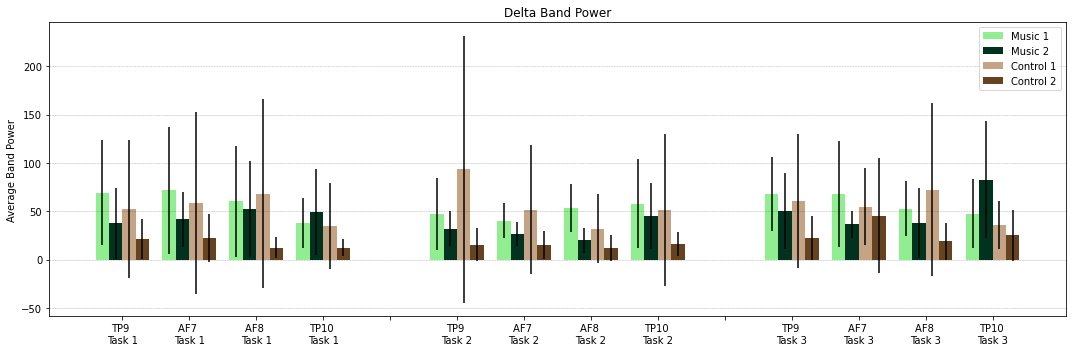

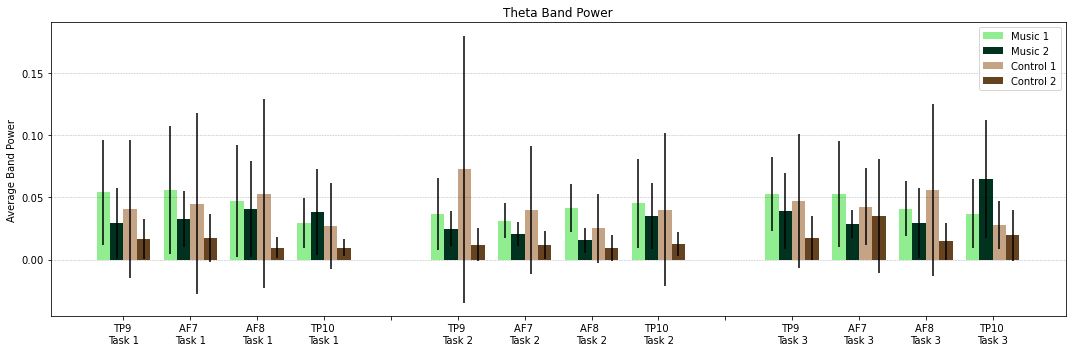

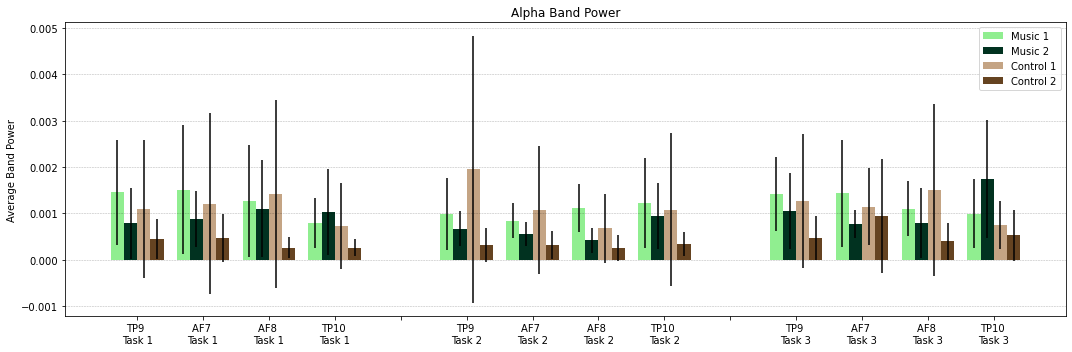

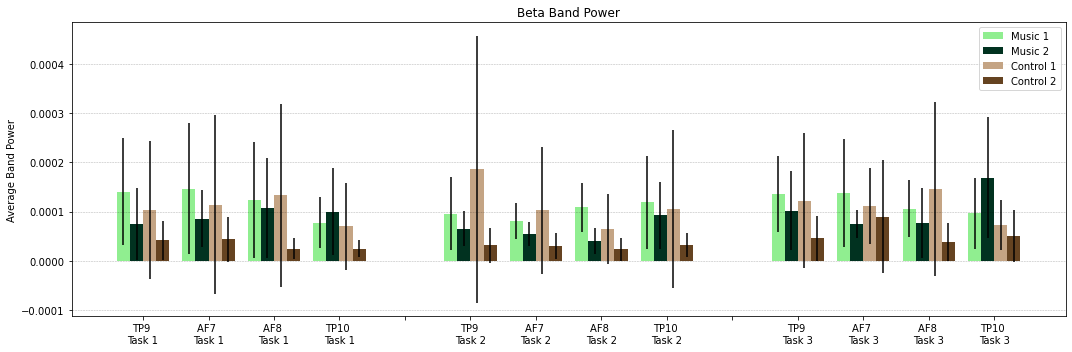

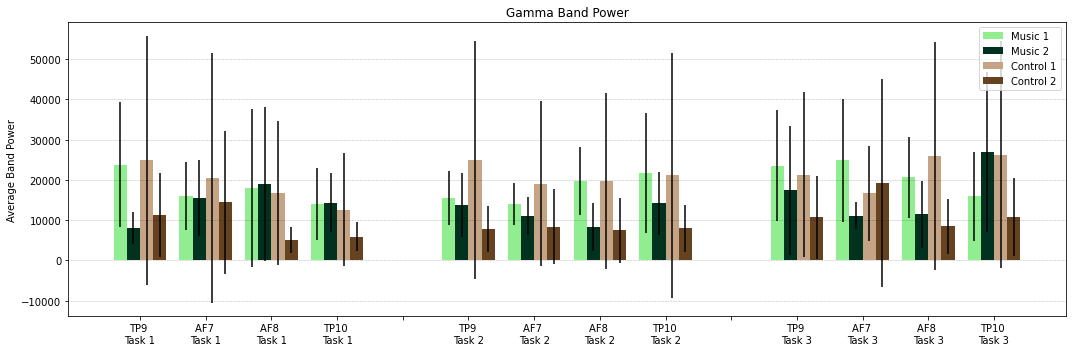

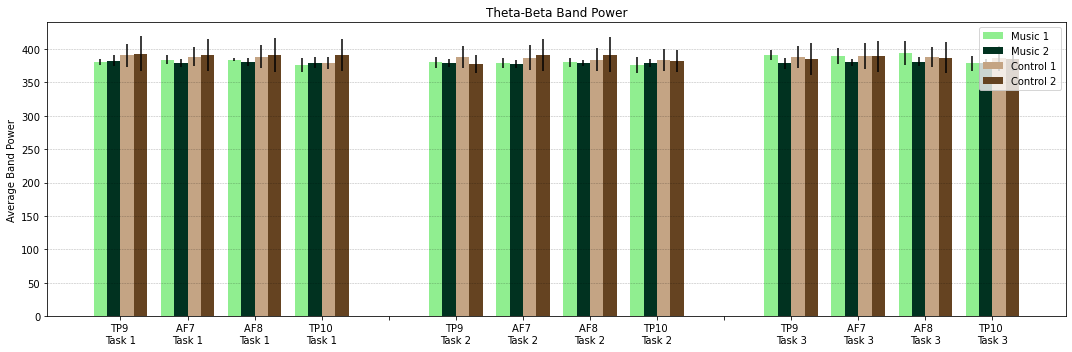

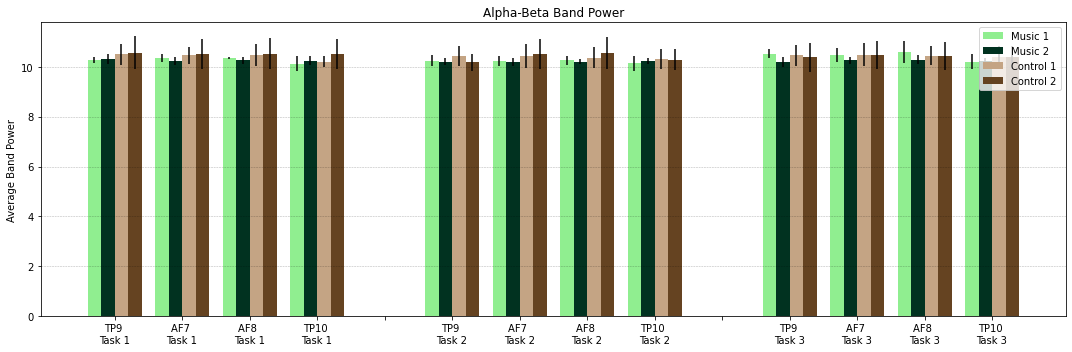

In [12]:
"""
Mean comparisons for bands that showed significant differences between the two groups 
(manually developed based on results from above)
"""

plot_averageBandPower([[delta_MT11,delta_MT12,delta_MT13],[delta_MT21,delta_MT22,delta_MT23]],
                        [[delta_CT11,delta_CT12,delta_CT13],[delta_CT21,delta_CT22,delta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Delta Band Power')

plot_averageBandPower([[theta_MT11,theta_MT12,theta_MT13],[theta_MT21,theta_MT22,theta_MT23]],
                        [[theta_CT11,theta_CT12,theta_CT13],[theta_CT21,theta_CT22,theta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Theta Band Power')

plot_averageBandPower([[alpha_MT11,alpha_MT12,alpha_MT13],[alpha_MT21,alpha_MT22,alpha_MT23]],
                        [[alpha_CT11,alpha_CT12,alpha_CT13],[alpha_CT21,alpha_CT22,alpha_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Alpha Band Power')

plot_averageBandPower([[beta_MT11,beta_MT12,beta_MT13],[beta_MT21,beta_MT22,beta_MT23]],
                        [[beta_CT11,beta_CT12,beta_CT13],[beta_CT21,beta_CT22,beta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Beta Band Power')

plot_averageBandPower([[gamma_MT11,gamma_MT12,gamma_MT13],[gamma_MT21,gamma_MT22,gamma_MT23]],
                        [[gamma_CT11,gamma_CT12,gamma_CT13],[gamma_CT21,gamma_CT22,gamma_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Gamma Band Power')
plot_averageBandPower([[theta_beta_MT11,theta_beta_MT12,theta_beta_MT13],[theta_beta_MT21,theta_beta_MT22,theta_beta_MT23]],
                        [[theta_beta_CT11,theta_beta_CT12,theta_beta_CT13],[theta_beta_CT21,theta_beta_CT22,theta_beta_CT23]],
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Theta-Beta Band Power')
plot_averageBandPower([[alpha_beta_MT11,alpha_beta_MT12,alpha_beta_MT13],[alpha_beta_MT21,alpha_beta_MT22,alpha_beta_MT23]],
                        [[alpha_beta_CT11,alpha_beta_CT12,alpha_beta_CT13],[alpha_beta_CT21,alpha_beta_CT22,alpha_beta_CT23]],  
                        ['TP9 \nTask 1','AF7 \nTask 1','AF8 \nTask 1','TP10 \nTask 1','','TP9 \nTask 2',
                        'AF7 \nTask 2','AF8 \nTask 2','TP10 \nTask 2','','TP9 \nTask 3','AF7 \nTask 3',
                        'AF8 \nTask 3','TP10 \nTask 3'],studygroups,(15,5),'Alpha-Beta Band Power')
                    

In [13]:
# merge delta result and export results to csv
#group_M = ["".join(map(str,x)) for x in itertools.product('M', range(1,len(delta_MT11)+1))]
#group_C = ["".join(map(str,x)) for x in itertools.product('C', range(1,len(delta_CT11)+1))]
#group = np.hstack((group_M,group_M,group_M,group_M,group_C,group_C,group_C,group_C))


group = np.hstack((np.repeat(['M'],len(delta_MT11)),np.repeat(['M'],len(delta_MT12)),
         np.repeat(['M'],len(delta_MT21)),np.repeat(['M'],len(delta_MT22)),
            np.repeat(['C'],len(delta_CT11)),np.repeat(['C'],len(delta_CT12)),
            np.repeat(['C'],len(delta_CT21)),np.repeat(['C'],len(delta_CT22)),
            np.repeat(['M'],len(theta_MT11)),np.repeat(['M'],len(theta_MT12)),
                np.repeat(['M'],len(theta_MT21)),np.repeat(['M'],len(theta_MT22)),
                        np.repeat(['C'],len(theta_CT11)),np.repeat(['C'],len(theta_CT12)),
                        np.repeat(['C'],len(theta_CT21)),np.repeat(['C'],len(theta_CT22)),
                        np.repeat(['M'],len(alpha_MT11)),np.repeat(['M'],len(alpha_MT12)),
                        np.repeat(['M'],len(alpha_MT21)),np.repeat(['M'],len(alpha_MT22)),
                        np.repeat(['C'],len(alpha_CT11)),np.repeat(['C'],len(alpha_CT12)),
                        np.repeat(['C'],len(alpha_CT21)),np.repeat(['C'],len(alpha_CT22)),
                        np.repeat(['M'],len(beta_MT11)),np.repeat(['M'],len(beta_MT12)),
                        np.repeat(['M'],len(beta_MT21)),np.repeat(['M'],len(beta_MT22)),
                        np.repeat(['C'],len(beta_CT11)),np.repeat(['C'],len(beta_CT12)),
                        np.repeat(['C'],len(beta_CT21)),np.repeat(['C'],len(beta_CT22)),
                        np.repeat(['M'],len(gamma_MT11)),np.repeat(['M'],len(gamma_MT12)),
                        np.repeat(['M'],len(gamma_MT21)),np.repeat(['M'],len(gamma_MT22)),
                        np.repeat(['C'],len(gamma_CT11)),np.repeat(['C'],len(gamma_CT12)),
                        np.repeat(['C'],len(gamma_CT21)),np.repeat(['C'],len(gamma_CT22))))

task = np.hstack((np.repeat([1],len(delta_MT11)),np.repeat([2],len(delta_MT12)),
        np.repeat([1],len(delta_MT21)),np.repeat([2],len(delta_MT22)),
        np.repeat([1],len(delta_CT11)),np.repeat([2],len(delta_CT12)),
        np.repeat([1],len(delta_CT21)),np.repeat([2],len(delta_CT22)),
        np.repeat([1],len(theta_MT11)),np.repeat([2],len(theta_MT12)),
        np.repeat([1],len(theta_MT21)),np.repeat([2],len(theta_MT22)),
        np.repeat([1],len(theta_CT11)),np.repeat([2],len(theta_CT12)),
        np.repeat([1],len(theta_CT21)),np.repeat([2],len(theta_CT22)),
        np.repeat([1],len(alpha_MT11)),np.repeat([2],len(alpha_MT12)),
        np.repeat([1],len(alpha_MT21)),np.repeat([2],len(alpha_MT22)),
        np.repeat([1],len(alpha_CT11)),np.repeat([2],len(alpha_CT12)),
        np.repeat([1],len(alpha_CT21)),np.repeat([2],len(alpha_CT22)),
        np.repeat([1],len(beta_MT11)),np.repeat([2],len(beta_MT12)),
        np.repeat([1],len(beta_MT21)),np.repeat([2],len(beta_MT22)),
        np.repeat([1],len(beta_CT11)),np.repeat([2],len(beta_CT12)),
        np.repeat([1],len(beta_CT21)),np.repeat([2],len(beta_CT22)),
        np.repeat([1],len(gamma_MT11)),np.repeat([2],len(gamma_MT12)),
        np.repeat([1],len(gamma_MT21)),np.repeat([2],len(gamma_MT22)),
        np.repeat([1],len(gamma_CT11)),np.repeat([2],len(gamma_CT12)),
        np.repeat([1],len(gamma_CT21)),np.repeat([2],len(gamma_CT22))))

time = np.hstack((np.repeat([1],len(delta_MT11)),np.repeat([1],len(delta_MT12)),
        np.repeat([2],len(delta_MT21)),np.repeat([2],len(delta_MT22)),
        np.repeat([1],len(delta_CT11)),np.repeat([1],len(delta_CT12)),
        np.repeat([2],len(delta_CT21)),np.repeat([2],len(delta_CT22)),
        np.repeat([1],len(theta_MT11)),np.repeat([1],len(theta_MT12)),
        np.repeat([2],len(theta_MT21)),np.repeat([2],len(theta_MT22)),
        np.repeat([1],len(theta_CT11)),np.repeat([1],len(theta_CT12)),
        np.repeat([2],len(theta_CT21)),np.repeat([2],len(theta_CT22)),
        np.repeat([1],len(alpha_MT11)),np.repeat([1],len(alpha_MT12)),
        np.repeat([2],len(alpha_MT21)),np.repeat([2],len(alpha_MT22)),
        np.repeat([1],len(alpha_CT11)),np.repeat([1],len(alpha_CT12)),
        np.repeat([2],len(alpha_CT21)),np.repeat([2],len(alpha_CT22)),
        np.repeat([1],len(beta_MT11)),np.repeat([1],len(beta_MT12)),
        np.repeat([2],len(beta_MT21)),np.repeat([2],len(beta_MT22)),
        np.repeat([1],len(beta_CT11)),np.repeat([1],len(beta_CT12)),
        np.repeat([2],len(beta_CT21)),np.repeat([2],len(beta_CT22)),
        np.repeat([1],len(gamma_MT11)),np.repeat([1],len(gamma_MT12)),
        np.repeat([2],len(gamma_MT21)),np.repeat([2],len(gamma_MT22)),
        np.repeat([1],len(gamma_CT11)),np.repeat([1],len(gamma_CT12)),
        np.repeat([2],len(gamma_CT21)),np.repeat([2],len(gamma_CT22))))

freq = np.hstack((np.repeat(['delta'],len(delta_MT11)+len(delta_MT12)+len(delta_MT21)+len(delta_MT22)+len(delta_CT11)+len(delta_CT12)+len(delta_CT21)+len(delta_CT22)),
        np.repeat(['theta'],len(theta_MT11)+len(theta_MT12)+len(theta_MT21)+len(theta_MT22)+len(theta_CT11)+len(theta_CT12)+len(theta_CT21)+len(theta_CT22)),
        np.repeat(['alpha'],len(alpha_MT11)+len(alpha_MT12)+len(alpha_MT21)+len(alpha_MT22)+len(alpha_CT11)+len(alpha_CT12)+len(alpha_CT21)+len(alpha_CT22)),
        np.repeat(['beta'],len(beta_MT11)+len(beta_MT12)+len(beta_MT21)+len(beta_MT22)+len(beta_CT11)+len(beta_CT12)+len(beta_CT21)+len(beta_CT22)),
        np.repeat(['gamma'],len(gamma_MT11)+len(gamma_MT12)+len(gamma_MT21)+len(gamma_MT22)+len(gamma_CT11)+len(gamma_CT12)+len(gamma_CT21)+len(gamma_CT22))))

power_TP9 = np.hstack((delta_MT11[:,0],delta_MT12[:,0],delta_MT21[:,0],delta_MT22[:,0],
                delta_CT11[:,0],delta_CT12[:,0],delta_CT21[:,0],delta_CT22[:,0],
                theta_MT11[:,0],theta_MT12[:,0],theta_MT21[:,0],theta_MT22[:,0],
                theta_CT11[:,0],theta_CT12[:,0],theta_CT21[:,0],theta_CT22[:,0],
                alpha_MT11[:,0],alpha_MT12[:,0],alpha_MT21[:,0],alpha_MT22[:,0],
                alpha_CT11[:,0],alpha_CT12[:,0],alpha_CT21[:,0],alpha_CT22[:,0],
                beta_MT11[:,0],beta_MT12[:,0],beta_MT21[:,0],beta_MT22[:,0],
                beta_CT11[:,0],beta_CT12[:,0],beta_CT21[:,0],beta_CT22[:,0],
                gamma_MT11[:,0],gamma_MT12[:,0],gamma_MT21[:,0],gamma_MT22[:,0],
                gamma_CT11[:,0],gamma_CT12[:,0],gamma_CT21[:,0],gamma_CT22[:,0]))

power_AF7 = np.hstack((delta_MT11[:,1],delta_MT12[:,1],delta_MT21[:,1],delta_MT22[:,1],
                delta_CT11[:,1],delta_CT12[:,1],delta_CT21[:,1],delta_CT22[:,1],
                theta_MT11[:,1],theta_MT12[:,1],theta_MT21[:,1],theta_MT22[:,1],
                theta_CT11[:,1],theta_CT12[:,1],theta_CT21[:,1],theta_CT22[:,1],
                alpha_MT11[:,1],alpha_MT12[:,1],alpha_MT21[:,1],alpha_MT22[:,1],
                alpha_CT11[:,1],alpha_CT12[:,1],alpha_CT21[:,1],alpha_CT22[:,1],
                beta_MT11[:,1],beta_MT12[:,1],beta_MT21[:,1],beta_MT22[:,1],
                beta_CT11[:,1],beta_CT12[:,1],beta_CT21[:,1],beta_CT22[:,1],
                gamma_MT11[:,1],gamma_MT12[:,1],gamma_MT21[:,1],gamma_MT22[:,1],
                gamma_CT11[:,1],gamma_CT12[:,1],gamma_CT21[:,1],gamma_CT22[:,1]))

power_AF8 = np.hstack((delta_MT11[:,2],delta_MT12[:,2],delta_MT21[:,2],delta_MT22[:,2],
                delta_CT11[:,2],delta_CT12[:,2],delta_CT21[:,2],delta_CT22[:,2],
                theta_MT11[:,2],theta_MT12[:,2],theta_MT21[:,2],theta_MT22[:,2],
                theta_CT11[:,2],theta_CT12[:,2],theta_CT21[:,2],theta_CT22[:,2],
                alpha_MT11[:,2],alpha_MT12[:,2],alpha_MT21[:,2],alpha_MT22[:,2],
                alpha_CT11[:,2],alpha_CT12[:,2],alpha_CT21[:,2],alpha_CT22[:,2],
                beta_MT11[:,2],beta_MT12[:,2],beta_MT21[:,2],beta_MT22[:,2],
                beta_CT11[:,2],beta_CT12[:,2],beta_CT21[:,2],beta_CT22[:,2],
                gamma_MT11[:,2],gamma_MT12[:,2],gamma_MT21[:,2],gamma_MT22[:,2],
                gamma_CT11[:,2],gamma_CT12[:,2],gamma_CT21[:,2],gamma_CT22[:,2]))

power_TP10 = np.hstack((delta_MT11[:,3],delta_MT12[:,3],delta_MT21[:,3],delta_MT22[:,3],
                delta_CT11[:,3],delta_CT12[:,3],delta_CT21[:,3],delta_CT22[:,3],
                theta_MT11[:,3],theta_MT12[:,3],theta_MT21[:,3],theta_MT22[:,3],
                theta_CT11[:,3],theta_CT12[:,3],theta_CT21[:,3],theta_CT22[:,3],
                alpha_MT11[:,3],alpha_MT12[:,3],alpha_MT21[:,3],alpha_MT22[:,3],
                alpha_CT11[:,3],alpha_CT12[:,3],alpha_CT21[:,3],alpha_CT22[:,3],
                beta_MT11[:,3],beta_MT12[:,3],beta_MT21[:,3],beta_MT22[:,3],
                beta_CT11[:,3],beta_CT12[:,3],beta_CT21[:,3],beta_CT22[:,3],
                gamma_MT11[:,3],gamma_MT12[:,3],gamma_MT21[:,3],gamma_MT22[:,3],
                gamma_CT11[:,3],gamma_CT12[:,3],gamma_CT21[:,3],gamma_CT22[:,3]))

power_mean = np.mean(np.vstack((power_TP9,power_AF7,power_AF8,power_TP10)).T,axis=1)

df = pd.DataFrame({'group':group,'task':task,'time':time,'freq':freq,'power':power_TP9})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v3.1norm_power_TP9_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'freq':freq,'power':power_AF7})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v3.1norm_power_AF7_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'freq':freq,'power':power_AF8})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v3.1norm_power_AF8_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'freq':freq,'power':power_TP10})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v3.1norm_power_TP10_result.csv',index=False)
df = pd.DataFrame({'group':group,'task':task,'time':time,'freq':freq,'power':power_mean})
df.to_csv('/Users/joshuaighalo/Documents/BrainNet/Projects/Workspace/results/music therapy/BandPower/v3.1norm_power_mean_result.csv',index=False)